## Load Data and Initial Grid Search

In [2]:
DATA_NAME = 'batch0approx1e5-agriVision-fourier-gray' # size-name-transform-channel

In [13]:
import git
from pathlib import Path
import os

ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
path_dict = dict(zip(['size', 'name', 'transform', 'channel'], DATA_NAME.split("-")))
CWD = os.path.join(ROOT_DIR, os.path.join("results", "case-studies", path_dict['name'], path_dict['transform'], path_dict['size'], path_dict['channel']))
assert CWD == os.getcwd()
Path(os.path.join(CWD, "CSVs")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "plots")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "cache")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "groupCDFs")).mkdir(exist_ok=True)

GROUP = 'layer' if path_dict['transform'] == 'wavelet' else ('band' if path_dict['transform'] == 'fourier' else 'error')
RERUN = True
CWD

'/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/results/case-studies/agriVision/fourier/batch0approx1e5/gray'

In [4]:
os.chdir(os.path.join(ROOT_DIR, "utilities"))
from testing import * # If MATLAB is not installed, open utilities and set to False
from plotting import *
os.chdir(CWD)
np.random.seed(0)

In [5]:
group_data_map = pd.read_pickle(os.path.join(ROOT_DIR, "transformed-data", f'{DATA_NAME}.pickle'))
group_total_samples = pd.read_pickle(os.path.join(ROOT_DIR, "transformed-data", f'{DATA_NAME}-size.pickle'))

GROUPS = np.arange(2, sorted(group_data_map)[-1] + 1)[::3]
cdfs_dir = os.path.join(ROOT_DIR, "results", "CDFs")
cdfs_list = [os.path.join(cdfs_dir, i) for i in os.listdir(cdfs_dir)]
all_cdfs = combine_pickles(cdfs_list[0])
for cdf_dir in cdfs_list[1:]:
    all_cdfs = all_cdfs | combine_pickles(cdf_dir)
    
# group_data_map = {g : group_data_map[g][::100] for g in GROUPS} # For quick testing purposes
group_total_samples


{2: 45000,
 3: 72000,
 4: 63000,
 5: 117000,
 6: 126000,
 7: 171000,
 8: 189000,
 9: 297000,
 10: 396000,
 11: 495000,
 12: 648000,
 13: 882000,
 14: 1134000,
 15: 1539000,
 16: 1953000,
 17: 2574000,
 18: 3456000,
 19: 4563000,
 20: 5967000,
 21: 8010000,
 22: 10395000,
 23: 13887000,
 24: 18297000,
 25: 24057000,
 26: 31968000,
 27: 42183000,
 28: 55764000,
 29: 73701000,
 30: 97326000,
 31: 108342000,
 32: 59634000,
 33: 21420000}

In [6]:
''' Only need to run commented code once'''
all_cdfs_df = create_kurt_var_ksstat_df(all_cdfs)
coarse_cdf_df = all_cdfs_df[(np.round(all_cdfs_df['r'], 0) == all_cdfs_df['r']) & (np.round(all_cdfs_df['eta'], 0) == all_cdfs_df['eta'])]
var_values_dict = dict()
kurt_values_dict = dict()
master_df = pd.DataFrame(columns=[GROUP]).set_index(GROUP)
all_cdfs_df.head()

/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:818: RuntimeWarning: invalid value encountered in scalar divide
  var_prior = scale * scipy.special.gamma(beta + 1/r)/scipy.special.gamma(beta)
/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:823: RuntimeWarning: overflow encountered in scalar multiply
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:823: RuntimeWarning: overflow encountered in scalar power
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
/Users/brandonmarks/Desktop/hierarchical-bayesian-model-validation/utilities/testing.py:823: RuntimeWarning: invalid value encountered in scalar divide
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2


,"(r,eta),cdf",r,eta,cdf,variance,kurtosis
0,"((0.02, -1.4), <scipy.interpolate._fitpack2.In...",0.02,-1.4,<scipy.interpolate._fitpack2.InterpolatedUniva...,9.618487e+69,1.391529e+25
1,"((0.02, -1.3), <scipy.interpolate._fitpack2.In...",0.02,-1.3,<scipy.interpolate._fitpack2.InterpolatedUniva...,3.821735e+74,8.172634e+21
2,"((0.02, -1.2), <scipy.interpolate._fitpack2.In...",0.02,-1.2,<scipy.interpolate._fitpack2.InterpolatedUniva...,1.455488e+78,4.131785e+19
3,"((0.02, -1.1), <scipy.interpolate._fitpack2.In...",0.02,-1.1,<scipy.interpolate._fitpack2.InterpolatedUniva...,1.406735e+81,6.947275e+17
4,"((0.02, -1.0), <scipy.interpolate._fitpack2.In...",0.02,-1.0,<scipy.interpolate._fitpack2.InterpolatedUniva...,5.331443e+83,2.562075e+16


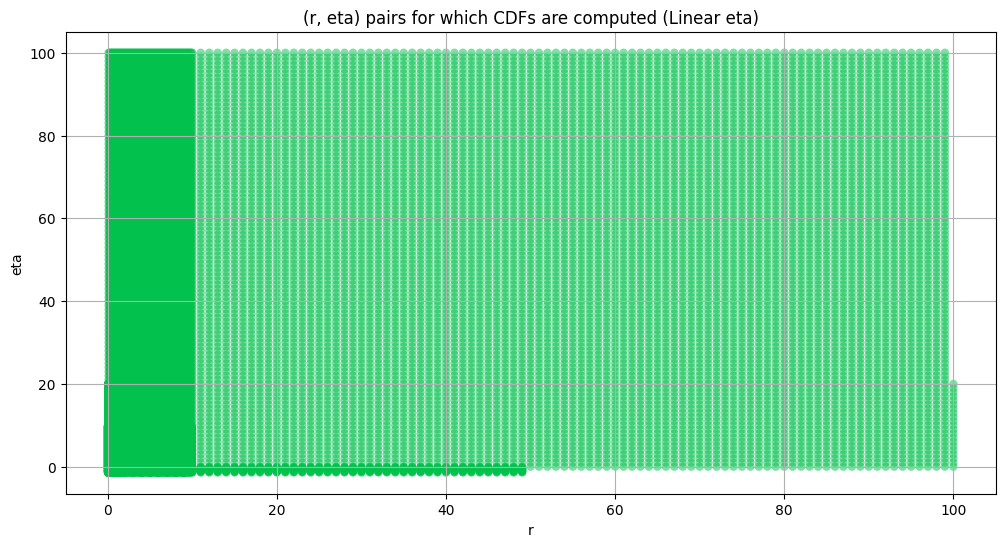

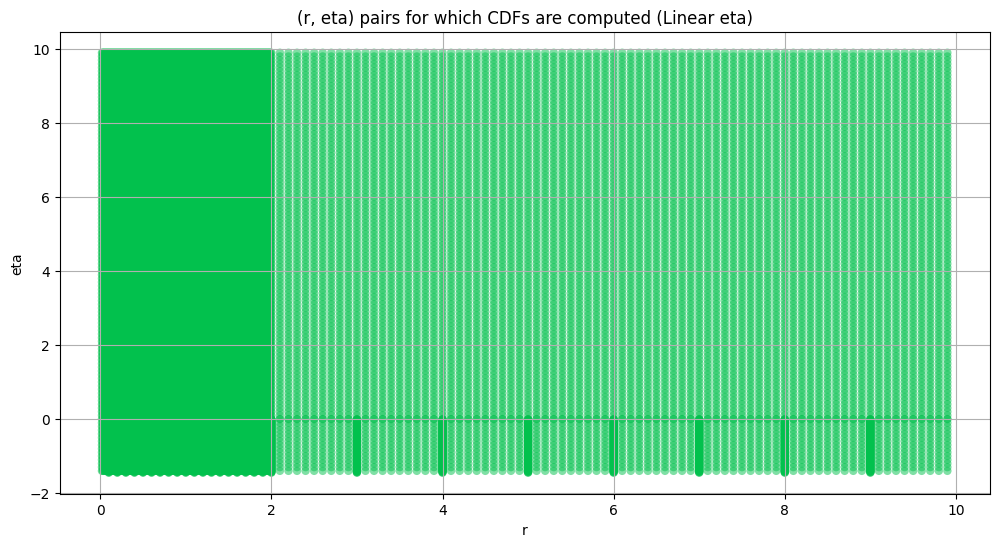

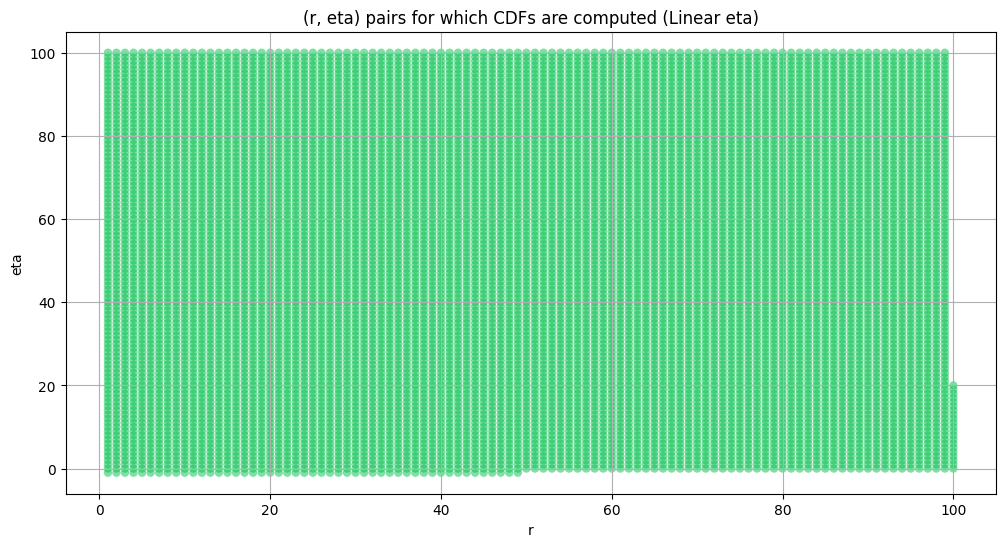

/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/numpy/_core/_methods.py:53: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/brandonmarks/opt/anaconda3/envs/NewResearch/lib/python3.10/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,r,eta,variance,kurtosis
count,55966.000000,55966.000000,5.596600e+04,5.472500e+04
mean,11.556061,19.856190,inf,inf
std,22.037516,27.794814,inf,NaN
min,0.020000,-1.450000,0.000000e+00,4.787254e-04
25%,0.980000,2.000000,9.733362e-01,1.987414e-02
50%,1.930000,6.900000,1.381758e+00,2.368581e-01
75%,8.000000,26.000000,5.224203e+00,9.264833e-01
max,100.000000,100.000000,1.797693e+308,inf


In [7]:
create_scatter_plot(all_cdfs_df)
create_scatter_plot(all_cdfs_df[(all_cdfs_df['r'] < 10) & (all_cdfs_df['eta'] < 10)])
create_scatter_plot(coarse_cdf_df)

all_cdfs_df.describe()

In [8]:
n_bootstrap = int(1e5)
bootstrap_size = int(1e4)
ci = 0.99

In [9]:
var_kurt_df_path = Path(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))

if RERUN or not var_kurt_df_path.exists():
    for group in  GROUPS:
        print(f'{GROUP.capitalize()} {group}')
        obs_var, var_lower, var_upper, var_values_dict[group] = bootstrap_metric(group_data_map[group], 
                                                                                n_bootstrap=n_bootstrap, 
                                                                                bootstrap_size=min(group_data_map[group].size, bootstrap_size), 
                                                                                metric= np.var, 
                                                                                ci=ci)
        obs_kurt, kurt_lower, kurt_upper, kurt_values_dict[group] = bootstrap_metric(group_data_map[group], 
                                                                                    n_bootstrap=n_bootstrap, 
                                                                                    bootstrap_size=min(group_data_map[group].size, bootstrap_size), 
                                                                                    metric= stats.kurtosis, ci=ci)  
        master_df.loc[group, 'obs_var'], master_df.loc[group, 'var_lower'], master_df.loc[group, 'var_upper'] = obs_var, var_lower, var_upper
        master_df.loc[group, 'obs_kurt'], master_df.loc[group, 'kurt_lower'], master_df.loc[group, 'kurt_upper'] = obs_kurt, kurt_lower, kurt_upper
        master_df.loc[group, 'total_samples'] = group_total_samples[group]

    master_df.to_csv(os.path.join(CWD, "CSVs", f'initial_grid_bootstrap{n_bootstrap}_{bootstrap_size}_ci{ci}.csv'))

master_df = pd.read_csv(var_kurt_df_path, index_col=GROUP)
var_kurt_df = pd.read_csv(var_kurt_df_path, index_col=GROUP)
master_df

,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples
band,,,,,,,
2,2.585050e+08,1.589284e+08,4.078820e+08,356.08157,99.133300,600.4443,45000.0
5,1.529785e+08,8.631151e+07,3.112997e+08,813.59064,103.779990,2060.5480,117000.0
8,5.121678e+07,3.003023e+07,9.583308e+07,612.80610,92.325806,1727.8018,189000.0
11,3.090617e+07,1.261454e+07,1.278532e+08,5769.23900,83.057900,6259.8403,495000.0
14,1.055680e+07,5.359151e+06,3.458285e+07,2610.08280,75.710780,4860.0464,1134000.0
17,6.451851e+06,2.578068e+06,3.393685e+07,11181.92200,65.416466,7685.5044,2574000.0
20,3.491903e+06,1.486023e+06,1.712065e+07,6724.62650,70.291565,6708.6846,5967000.0
23,1.724653e+06,5.911003e+05,1.148688e+07,16738.59000,63.702858,8285.5580,13887000.0
26,1.045736e+06,1.697875e+05,1.057094e+07,32596.10400,71.612460,9318.7330,31968000.0


In [12]:
master_df_combo_path = Path(os.path.join(CWD, "CSVs", "master_df_combo.csv"))
group_cdf_df_dict_path = Path(os.path.join(CWD, "cache", "group_cdf_df_dict_full.pickle"))

if RERUN or not master_df_combo_path.exists() or not group_cdf_df_dict_path.exists():
    sorted_params = sorted(all_cdfs)
    group_cdf_df_dict = dict()

    for i, group in enumerate(GROUPS):
        print(f"####\n{GROUP.capitalize()} ", group)
        sample = group_data_map[group]
        group_cdf_df = all_cdfs_df.copy()
        ksstats, initial_param, min_stat = gridsearch(sample, all_cdfs, debug=True)
        master_df.loc[group, 'initial_r'], master_df.loc[group, 'initial_eta'] = initial_param
        print(f"Number of samples: {sample.size}, Without approximation : {master_df.loc[group, 'total_samples']}")
        master_df.loc[group, 'kstest_stat_initial'] = min_stat
        cutoff = stats.kstwo(n=master_df.loc[group, 'total_samples']).isf(0.05)
        master_df.loc[group, 'kstest_stat_cutoff_0.05'] = cutoff

        group_cdf_df = add_tests_to_df(cdfs_df = group_cdf_df, group = group, var_kurt_df = master_df, ksstats = ksstats)
        
        group_cdf_df_dict[group] = group_cdf_df
        cols = ['pass_var', 'pass_kstest', 'pass_kurt']

        fig = combo_test_plot(group_cdf_df_dict[group], cols, 
                            plot_name=f"{GROUP.capitalize()} {group}: {', '.join([col[5:].capitalize() for col in cols])}", 
                            target_var = master_df.loc[group, 'obs_var'],
                            best_param = initial_param)
        
        fig.figure.savefig(os.path.join(CWD, "plots", f"full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=600)

        # Optional: Create plots of bootstrapped variance and kurtosis for varying confidence intervals
        # fig_var = create_ci_scatter_plot(group_cdf_df_dict[group], var_values_dict, metric='variance', group=group)
        # fig_kurt = create_ci_scatter_plot(group_cdf_df_dict[group], kurt_values_dict, metric='kurtosis', group=group)

        # fig_var.savefig(os.path.join(CWD, "plots", f"ci_scatter_variance_{GROUP}_{group}_bootstrap{n_bootstrap}.jpg"), bbox_inches='tight')
        # plt.close(fig_var)
        # fig_kurt.savefig(os.path.join(CWD, "plots", f"ci_scatter_variance_{GROUP}_{group}_bootstrap{n_bootstrap}.jpg"), bbox_inches='tight')
        # plt.close(fig_kurt)

    master_df.to_csv(os.path.join(CWD, "CSVs", "master_df_combo.csv"))
    pd.to_pickle(group_cdf_df_dict, os.path.join(CWD, "cache", "group_cdf_df_dict_full.pickle"))

group_cdf_df_dict = pd.read_pickle(group_cdf_df_dict_path)
master_df = pd.read_csv(master_df_combo_path, index_col=GROUP)
master_df

,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples,initial_r,initial_eta,kstest_stat_initial,kstest_stat_cutoff_0.05
band,,,,,,,,,,,
2,2.585050e+08,1.589284e+08,4.078820e+08,356.08157,99.133300,600.4443,45000.0,0.16,1.0,0.010913,0.006398
5,1.529785e+08,8.631151e+07,3.112997e+08,813.59064,103.779990,2060.5480,117000.0,0.16,0.7,0.011256,0.003969
8,5.121678e+07,3.003023e+07,9.583308e+07,612.80610,92.325806,1727.8018,189000.0,0.18,1.5,0.008814,0.003123
11,3.090617e+07,1.261454e+07,1.278532e+08,5769.23900,83.057900,6259.8403,495000.0,0.19,1.7,0.008397,0.001930
14,1.055680e+07,5.359151e+06,3.458285e+07,2610.08280,75.710780,4860.0464,1134000.0,0.20,2.0,0.006294,0.001275
17,6.451851e+06,2.578068e+06,3.393685e+07,11181.92200,65.416466,7685.5044,2574000.0,0.20,1.5,0.006467,0.000846
20,3.491903e+06,1.486023e+06,1.712065e+07,6724.62650,70.291565,6708.6846,5967000.0,0.19,0.7,0.006697,0.000556
23,1.724653e+06,5.911003e+05,1.148688e+07,16738.59000,63.702858,8285.5580,13887000.0,0.20,0.6,0.012452,0.000364
26,1.045736e+06,1.697875e+05,1.057094e+07,32596.10400,71.612460,9318.7330,31968000.0,0.20,0.1,0.008531,0.000240


In [14]:
master_df_eta0_path = Path(os.path.join(CWD, "CSVs", "master_df_eta0.csv"))
if RERUN or not master_df_eta0_path.exists():
    best_params_eta0 = []
    for i, group in enumerate(GROUPS):
        if master_df.loc[group, 'initial_eta'] != 0:
            sample = group_data_map[group]
            group_cdf = all_cdfs_df[all_cdfs_df['eta'] == 0]
            cdfs_dict = {i[0]:i[1] for i in group_cdf['(r,eta),cdf']}
            ksstats, best_param_eta0, kstest_stat_eta0 = gridsearch(sample, cdfs_dict, debug=True)
            best_params_eta0.append(best_param_eta0[0])
            master_df.loc[group, 'kstest_stat_eta0'] = kstest_stat_eta0
        else:
            master_df.loc[group, 'kstest_stat_eta0'] = master_df.loc[group, 'kstest_stat_initial']
            best_params_eta0.append(master_df.loc[group, 'initial_r'])
    master_df['best_r_eta0'] = best_params_eta0
    master_df.to_csv(os.path.join(CWD, "CSVs", "master_df_eta0.csv"))

master_df = pd.read_csv(master_df_eta0_path, index_col=GROUP)
master_df

100%|██████████| 369/369 [00:00<00:00, 437.20it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:01<00:00, 320.57it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:01<00:00, 342.18it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:01<00:00, 340.84it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:01<00:00, 343.71it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:01<00:00, 317.91it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:01<00:00, 334.22it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:01<00:00, 343.22it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:01<00:00, 344.29it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:01<00:00, 347.84it/s]


Finding Minimum after computing 369 CDFs


100%|██████████| 369/369 [00:01<00:00, 338.45it/s]

Finding Minimum after computing 369 CDFs


,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples,initial_r,initial_eta,kstest_stat_initial,kstest_stat_cutoff_0.05,kstest_stat_eta0,best_r_eta0
band,,,,,,,,,,,,,
2,2.585050e+08,1.589284e+08,4.078820e+08,356.08157,99.133300,600.4443,45000.0,0.16,1.0,0.010913,0.006398,0.044432,0.14
5,1.529785e+08,8.631151e+07,3.112997e+08,813.59064,103.779990,2060.5480,117000.0,0.16,0.7,0.011256,0.003969,0.052069,0.14
8,5.121678e+07,3.003023e+07,9.583308e+07,612.80610,92.325806,1727.8018,189000.0,0.18,1.5,0.008814,0.003123,0.045345,0.15
11,3.090617e+07,1.261454e+07,1.278532e+08,5769.23900,83.057900,6259.8403,495000.0,0.19,1.7,0.008397,0.001930,0.044391,0.15
14,1.055680e+07,5.359151e+06,3.458285e+07,2610.08280,75.710780,4860.0464,1134000.0,0.20,2.0,0.006294,0.001275,0.048602,0.16
17,6.451851e+06,2.578068e+06,3.393685e+07,11181.92200,65.416466,7685.5044,2574000.0,0.20,1.5,0.006467,0.000846,0.040361,0.16
20,3.491903e+06,1.486023e+06,1.712065e+07,6724.62650,70.291565,6708.6846,5967000.0,0.19,0.7,0.006697,0.000556,0.028827,0.17
23,1.724653e+06,5.911003e+05,1.148688e+07,16738.59000,63.702858,8285.5580,13887000.0,0.20,0.6,0.012452,0.000364,0.026761,0.18
26,1.045736e+06,1.697875e+05,1.057094e+07,32596.10400,71.612460,9318.7330,31968000.0,0.20,0.1,0.008531,0.000240,0.029359,0.20


In [15]:
def simple_add_cdfs(r_range, eta_range, dir, folder_name = '', n_samples = 500, tail_bound = 0.01, tail_percent = 0.1, enforce_assert=True, return_assert = False, debug=False):

    if folder_name == '':
        folder_name = f'r{round_to_sigfigs(min(r_range))}to{round_to_sigfigs(max(r_range))}_eta{round_to_sigfigs(min(eta_range))}to{round_to_sigfigs(max(eta_range))}'

    FOLDER_PATH = os.path.join(dir, folder_name)

    if os.path.isdir(FOLDER_PATH):
        cdfs_completed = combine_pickles(FOLDER_PATH)
        if debug:
            print("CDFs completed:", len(cdfs_completed))
    else:
        Path(os.path.join(os.getcwd(), FOLDER_PATH)).mkdir()
        cdfs_completed = dict()

    n = len(r_range)*len(eta_range)
    finished = len(cdfs_completed)
    cnt = len(cdfs_completed)
    for r in r_range:
        r_cdf = dict()
        r = round_to_sigfigs(r)
        for eta in eta_range:
            eta = round_to_sigfigs(eta)
            if ((r, eta) in cdfs_completed) and cdfs_completed[(r, eta)]:
                continue
            cnt += 1
            if debug:
                print(f'{(r, eta)}, {cnt} of {n + finished}')
            if cnt % 50 == 0:
                print(f'{(r, eta)}, {cnt} of {n + finished}')

            computed_cdf = compute_prior_cdf(r = r, eta = eta, method = 'gamma_cdf', n_samples = n_samples, tail_percent = tail_percent, tail_bound = tail_bound, 
                                             enforce_assert=enforce_assert, return_assert=return_assert, debug=debug)
            r_cdf[(r, eta)] = computed_cdf
        if r_cdf:
            sorted_r_cdf = [i[1] for i in sorted(r_cdf)]
            min_eta, max_eta = round_to_sigfigs(min(sorted_r_cdf), 6), round_to_sigfigs(max(sorted_r_cdf), 6)
            pkl_path = os.path.join(FOLDER_PATH, f'r{r}_eta{min_eta}to{max_eta}.pickle')
            pd.to_pickle(r_cdf, pkl_path)
        else:
            if debug:
                print(f"Skipped {r} entirely")

    if debug:
        print(f'You can find the CDFs here: {os.path.join(os.getcwd(), FOLDER_PATH)}')

Band 2


100%|██████████| 1034/1034 [00:01<00:00, 762.54it/s]


Finding Minimum after computing 1034 CDFs
Iter 1 band 2 best parameters: ((0.1611, 1.057), 0.00940515944318604)


100%|██████████| 1034/1034 [00:01<00:00, 692.43it/s]


Finding Minimum after computing 1034 CDFs
Iter 2 band 2 best parameters: ((0.1611, 1.057), 0.00940515944318604)


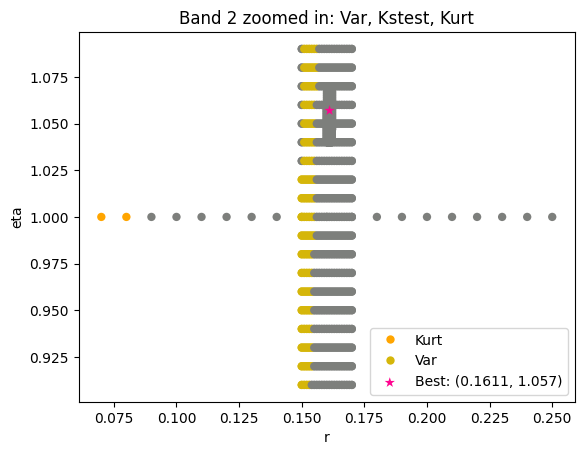

Band 5


100%|██████████| 1525/1525 [00:04<00:00, 342.52it/s]


Finding Minimum after computing 1525 CDFs
Iter 1 band 5 best parameters: ((0.1618, 0.799), 0.008569332856036782)
(0.161, 0.804), 1550 of 1966
(0.1615, 0.804), 1600 of 1966
(0.162, 0.804), 1650 of 1966
(0.1625, 0.804), 1700 of 1966
(0.1628, 0.802), 1750 of 1966


100%|██████████| 1757/1757 [00:05<00:00, 339.10it/s]


Finding Minimum after computing 1757 CDFs
Iter 2 band 5 best parameters: ((0.162, 0.809), 0.008429548492968786)


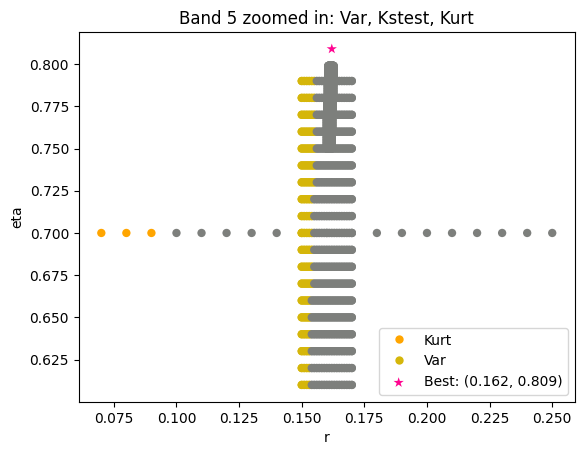

Band 8


100%|██████████| 1291/1291 [00:03<00:00, 338.58it/s]


Finding Minimum after computing 1291 CDFs
Iter 1 band 8 best parameters: ((0.1785, 1.396), 0.007316676531062494)
(0.1775, 1.394), 1300 of 1732
(0.1781, 1.388), 1350 of 1732
(0.1788, 1.389), 1400 of 1732
(0.1795, 1.39), 1450 of 1732


100%|██████████| 1452/1452 [00:04<00:00, 304.68it/s]


Finding Minimum after computing 1452 CDFs
Iter 2 band 8 best parameters: ((0.1784, 1.39), 0.007285595053516114)


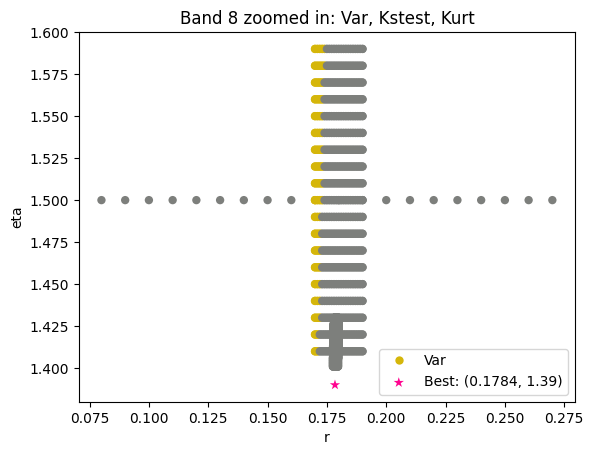

Band 11


100%|██████████| 1133/1133 [00:04<00:00, 227.61it/s]


Finding Minimum after computing 1133 CDFs
Iter 1 band 11 best parameters: ((0.1877, 1.633), 0.005714673150858246)
(0.1867, 1.639), 1150 of 1574
(0.1875, 1.626), 1200 of 1574
(0.1883, 1.628), 1250 of 1574


100%|██████████| 1274/1274 [00:03<00:00, 363.57it/s]


Finding Minimum after computing 1274 CDFs
Iter 2 band 11 best parameters: ((0.1876, 1.626), 0.005689922934965397)


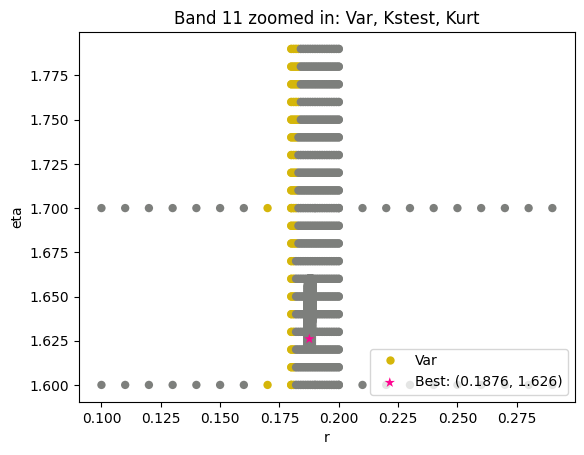

Band 14


100%|██████████| 1193/1193 [00:03<00:00, 365.65it/s]


Finding Minimum after computing 1193 CDFs
Iter 1 band 14 best parameters: ((0.1987, 1.909), 0.005211131718584006)
(0.1977, 1.905), 1200 of 1634
(0.1983, 1.9), 1250 of 1634
(0.199, 1.902), 1300 of 1634
(0.1997, 1.903), 1350 of 1634


100%|██████████| 1352/1352 [00:03<00:00, 367.75it/s]


Finding Minimum after computing 1352 CDFs
Iter 2 band 14 best parameters: ((0.1986, 1.903), 0.005177036609421259)


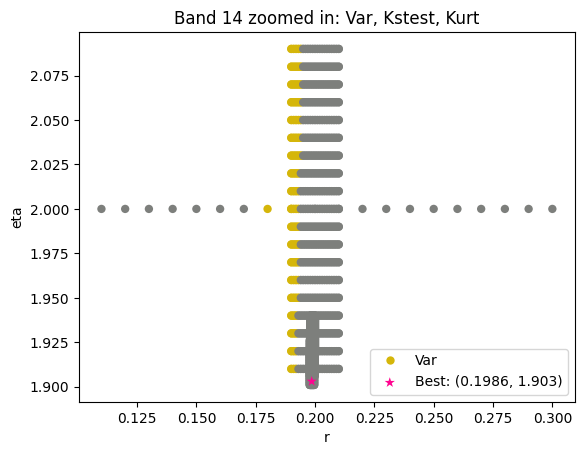

Band 17


100%|██████████| 1235/1235 [00:03<00:00, 362.58it/s]


Finding Minimum after computing 1235 CDFs
Iter 1 band 17 best parameters: ((0.1975, 1.419), 0.0036431215632408438)
(0.1965, 1.423), 1250 of 1676
(0.1973, 1.411), 1300 of 1676
(0.1981, 1.414), 1350 of 1676


100%|██████████| 1374/1374 [00:03<00:00, 365.24it/s]


Finding Minimum after computing 1374 CDFs
Iter 2 band 17 best parameters: ((0.1974, 1.413), 0.003629222782176353)


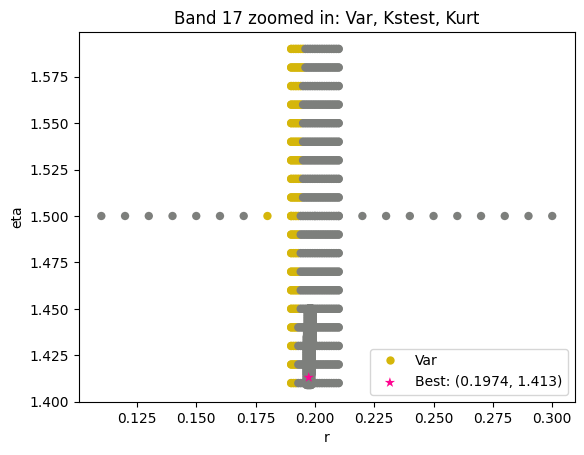

Band 20


100%|██████████| 1080/1080 [00:03<00:00, 359.47it/s]


Finding Minimum after computing 1080 CDFs
Iter 1 band 20 best parameters: ((0.1925, 0.807), 0.0043974120002887584)
(0.1917, 0.813), 1100 of 1521
(0.1923, 0.815), 1150 of 1521
(0.1929, 0.817), 1200 of 1521
(0.1934, 0.814), 1250 of 1521


100%|██████████| 1274/1274 [00:03<00:00, 365.81it/s]


Finding Minimum after computing 1274 CDFs
Iter 2 band 20 best parameters: ((0.1927, 0.815), 0.0043286382502517595)


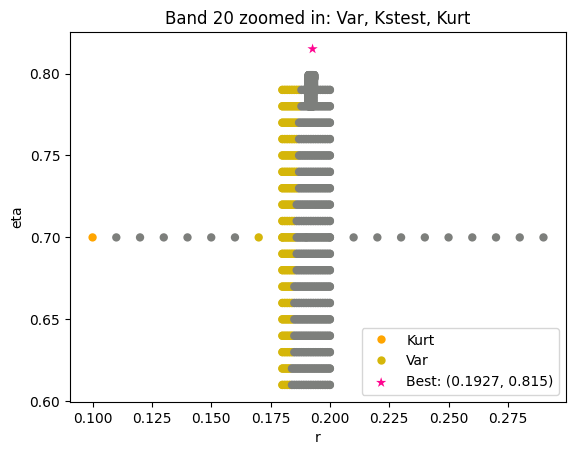

Band 23


100%|██████████| 1093/1093 [00:02<00:00, 365.15it/s]


Finding Minimum after computing 1093 CDFs
Iter 1 band 23 best parameters: ((0.1977, 0.58), 0.005469228044667873)


100%|██████████| 1093/1093 [00:02<00:00, 366.76it/s]


Finding Minimum after computing 1093 CDFs
Iter 2 band 23 best parameters: ((0.1977, 0.58), 0.005469228044667873)


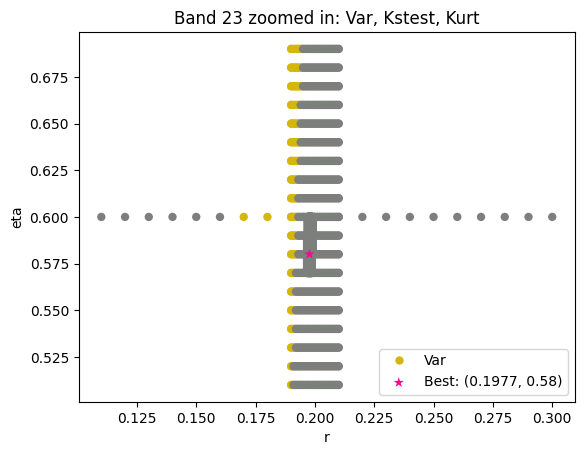

Band 26


100%|██████████| 1104/1104 [00:03<00:00, 366.98it/s]


Finding Minimum after computing 1104 CDFs
Iter 1 band 26 best parameters: ((0.2014, 0.145), 0.006073382500446423)
(0.2006, 0.138), 1150 of 1545
(0.2016, 0.138), 1200 of 1545


100%|██████████| 1241/1241 [00:03<00:00, 368.36it/s]


Finding Minimum after computing 1241 CDFs
Iter 2 band 26 best parameters: ((0.2014, 0.145), 0.006073382500446423)


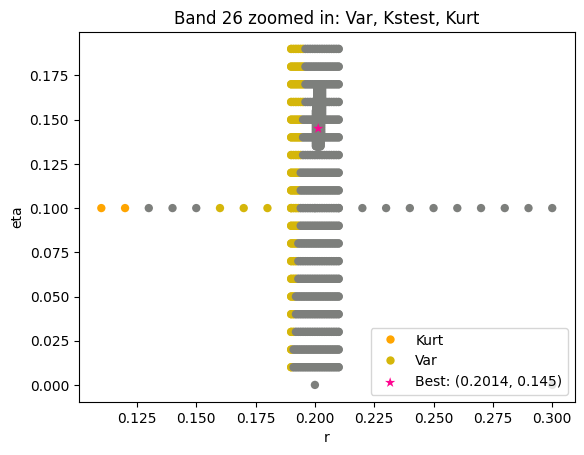

Band 29


100%|██████████| 934/934 [00:02<00:00, 365.18it/s]


Finding Minimum after computing 934 CDFs
Iter 1 band 29 best parameters: ((0.2191, -0.228), 0.009940693334922646)


100%|██████████| 934/934 [00:02<00:00, 367.82it/s]


Finding Minimum after computing 934 CDFs
Iter 2 band 29 best parameters: ((0.2191, -0.228), 0.009940693334922646)


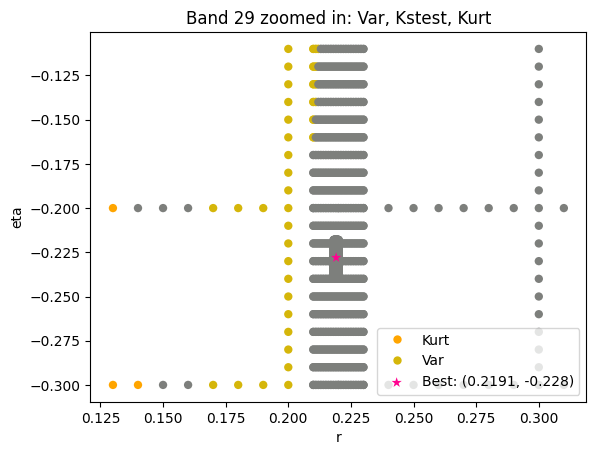

Band 32
(0.282, 0.09), 50 of 420
(0.284, 0.19), 100 of 420
(0.287, 0.09), 150 of 420
(0.289, 0.19), 200 of 420
(0.292, 0.09), 250 of 420
(0.294, 0.19), 300 of 420
(0.297, 0.09), 350 of 420
(0.299, 0.19), 400 of 420


100%|██████████| 420/420 [00:01<00:00, 349.06it/s]


Finding Minimum after computing 420 CDFs
Iter 1 band 32 best parameters: ((0.283, 0.02), 0.014928803565226224)
(0.2821, 0.021), 450 of 840
(0.2824, 0.011), 500 of 840
(0.2826, 0.021), 550 of 840
(0.2829, 0.011), 600 of 840
(0.2831, 0.023), 650 of 840
(0.2834, 0.013), 700 of 840
(0.2836, 0.023), 750 of 840
(0.2839, 0.013), 800 of 840


100%|██████████| 834/834 [00:02<00:00, 364.16it/s]


Finding Minimum after computing 834 CDFs
Iter 2 band 32 best parameters: ((0.2823, 0.01), 0.014771556170115784)


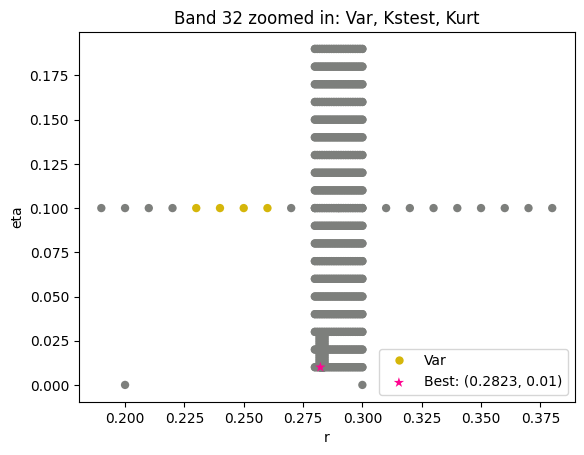

,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples,initial_r,initial_eta,kstest_stat_initial,...,best_r,best_eta,kstest_stat_best,iter1_r,iter1_eta,kstest_stat_iter1,iter2_r,iter2_eta,kstest_stat_iter2,n_pval_0.05
band,,,,,,,,,,,,,,,,,,,,,
2,2.585050e+08,1.589284e+08,4.078820e+08,356.08157,99.133300,600.4443,45000.0,0.16,1.0,0.010913,...,0.1611,1.057,0.009405,0.1611,1.057,0.009405,0.1611,1.057,0.009405,21357
5,1.529785e+08,8.631151e+07,3.112997e+08,813.59064,103.779990,2060.5480,117000.0,0.16,0.7,0.011256,...,0.1620,0.809,0.008430,0.1618,0.799,0.008569,0.1620,0.809,0.008430,24678
8,5.121678e+07,3.003023e+07,9.583308e+07,612.80610,92.325806,1727.8018,189000.0,0.18,1.5,0.008814,...,0.1784,1.390,0.007286,0.1785,1.396,0.007317,0.1784,1.390,0.007286,35437
11,3.090617e+07,1.261454e+07,1.278532e+08,5769.23900,83.057900,6259.8403,495000.0,0.19,1.7,0.008397,...,0.1876,1.626,0.005690,0.1877,1.633,0.005715,0.1876,1.626,0.005690,58729
14,1.055680e+07,5.359151e+06,3.458285e+07,2610.08280,75.710780,4860.0464,1134000.0,0.20,2.0,0.006294,...,0.1986,1.903,0.005177,0.1987,1.909,0.005211,0.1986,1.903,0.005177,70875
17,6.451851e+06,2.578068e+06,3.393685e+07,11181.92200,65.416466,7685.5044,2574000.0,0.20,1.5,0.006467,...,0.1974,1.413,0.003629,0.1975,1.419,0.003643,0.1974,1.413,0.003629,135736
20,3.491903e+06,1.486023e+06,1.712065e+07,6724.62650,70.291565,6708.6846,5967000.0,0.19,0.7,0.006697,...,0.1927,0.815,0.004329,0.1925,0.807,0.004397,0.1927,0.815,0.004329,99558
23,1.724653e+06,5.911003e+05,1.148688e+07,16738.59000,63.702858,8285.5580,13887000.0,0.20,0.6,0.012452,...,0.1977,0.580,0.005469,0.1977,0.580,0.005469,0.1977,0.580,0.005469,61026
26,1.045736e+06,1.697875e+05,1.057094e+07,32596.10400,71.612460,9318.7330,31968000.0,0.20,0.1,0.008531,...,0.2014,0.145,0.006073,0.2014,0.145,0.006073,0.2014,0.145,0.006073,52680


In [16]:
master_df_optimized_path = Path(os.path.join(CWD, "CSVs", 'master_df_optimized.csv'))

SKIP_OPTIMIZE_STEP = False
NUM_ITERS = dict(zip(GROUPS, [2]*len(GROUPS)))
NUM_SAMPLES_OPTIMIZE = 2000

if RERUN or not master_df_optimized_path.exists():
    if SKIP_OPTIMIZE_STEP:
        master_df['kstest_stat'] = master_df['kstest_stat_initial']
        master_df[f'best_r'] = master_df['initial_r']
        master_df[f'best_eta'] = master_df['initial_eta']
    else:
        for group in GROUPS: 
            print(f"{GROUP.capitalize()} {group}")
            sample = group_data_map[group]
            initial_r, initial_eta = master_df.loc[group, 'initial_r'], master_df.loc[group, f'initial_eta']
            r_granularity = 10
            eta_granularity = 10
            for i in range(-1, -5, -1):
                if tuple([round_to_sigfigs(initial_r + 10.**i), initial_eta]) in all_cdfs:
                    r_granularity = 10.**i
                if tuple([initial_r, round_to_sigfigs(initial_eta + 10.**i)]) in all_cdfs:
                    
                    eta_granularity = 10.**i

            for d in range(1, NUM_ITERS[group] + 1):
                if d == 1:
                    initial_r, initial_eta = master_df.loc[group, 'initial_r'], master_df.loc[group, f'initial_eta']
                else:
                    initial_r, initial_eta = master_df.loc[group, f'iter{d - 1}_r'], master_df.loc[group, f'iter{d - 1}_eta']
                r_granularity = r_granularity * 10.0**(-d+1) 
                eta_granularity = eta_granularity * 10.0**(-d+1) 

                r_range = [round_to_sigfigs(x) for x in np.arange(initial_r - r_granularity, initial_r + r_granularity, r_granularity/10)]
                eta_range = [round_to_sigfigs(x) for x in np.arange(initial_eta - eta_granularity, initial_eta + eta_granularity, eta_granularity/10)]
                simple_add_cdfs(r_range, eta_range, dir = os.path.join(CWD, "groupCDFs"), folder_name=f'{GROUP}{group}', n_samples = NUM_SAMPLES_OPTIMIZE, debug=False, tail_bound=1e-5)
                cdfs_dict = combine_pickles(os.path.join(CWD, "groupCDFs", f'{GROUP}{group}'))
                ksstats, best_param, kstest_stat = gridsearch(sample, cdfs_dict, debug=True)

                temp_df = create_kurt_var_ksstat_df(cdfs_dict)
                temp_df = add_tests_to_df(cdfs_df=temp_df, group=group, var_kurt_df=master_df, ksstats=ksstats)
                group_cdf_df_dict[group] = pd.concat([group_cdf_df_dict[group], temp_df])
                master_df.loc[group, 'best_r'], master_df.loc[group, f'best_eta'] = best_param[0], best_param[1]
                master_df.loc[group, 'kstest_stat_best'] = kstest_stat
                master_df.loc[group, f'iter{d}_r'], master_df.loc[group, f'iter{d}_eta'] = best_param[0], best_param[1]
                master_df.loc[group, f'kstest_stat_iter{d}'] = kstest_stat
                
                print(f"Iter {d} {GROUP} {group} best parameters: {best_param, master_df.loc[group, f'kstest_stat_iter{d}']}")

            temp_df = group_cdf_df_dict[group]
            eps = 0.1
            filtered_df = temp_df[(temp_df['r'] > master_df.loc[group, 'initial_r'] - eps) & 
                            (temp_df['r'] < master_df.loc[group, 'initial_r'] + eps) &
                            (temp_df['eta'] > master_df.loc[group, 'initial_eta'] - eps) &
                            (temp_df['eta'] < master_df.loc[group, 'initial_eta'] + eps)]
            cols = ['pass_var', 'pass_kstest', 'pass_kurt']
            fig = combo_test_plot(filtered_df, cols, 
                                plot_name=f"{GROUP.capitalize()} {group} zoomed in: {', '.join([col[5:].capitalize() for col in cols])}",
                                best_param=(master_df.loc[group, 'best_r'], master_df.loc[group, f'best_eta']))
            fig.figure.savefig(os.path.join(CWD, "plots", f"optimized_full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=600)
            
    master_df['n_pval_0.05'] = master_df.apply(lambda row : find_n_fixed_pval_stat(row.loc['kstest_stat_best'], row.loc['total_samples']), axis = 1)    
    master_df[['total_samples', 'initial_r', 'initial_eta', 'kstest_stat_initial', f'best_r', f'best_eta', 'kstest_stat_best', 'n_pval_0.05']].to_csv(os.path.join(CWD, "CSVs", 'optimized_params.csv'))
    master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df_optimized.csv'))

master_df = pd.read_csv(master_df_optimized_path, index_col = GROUP)
master_df

## Comparing Empirical and Computed CDF/PDF

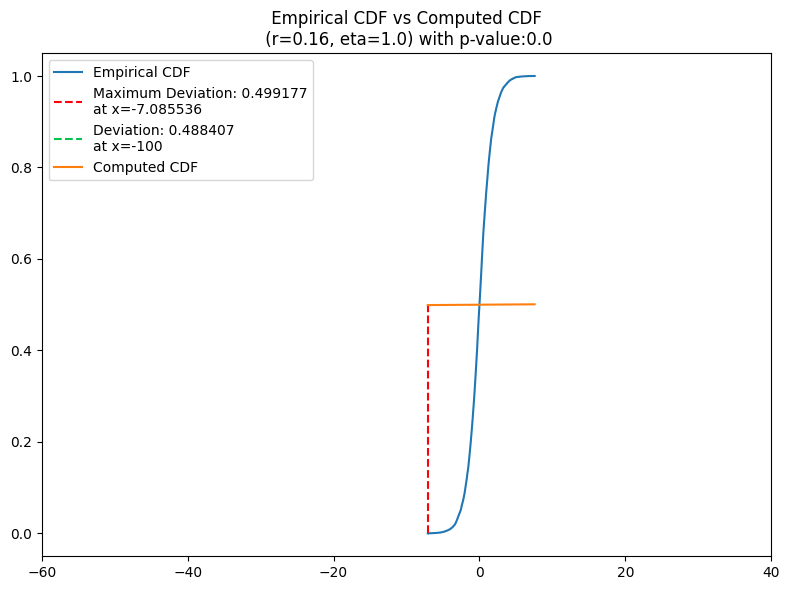

In [17]:
# Example Cell
group = 2
visualize_cdf(sample = sample_prior(1, 1, 10000), 
              all_cdfs = None, 
              params = (master_df.loc[group, 'initial_r'], master_df.loc[group, 'initial_eta']),
              distro = 'gengamma',
              n_samples=200, 
              interval = (-60, 40), 
              provided_loc = -100);

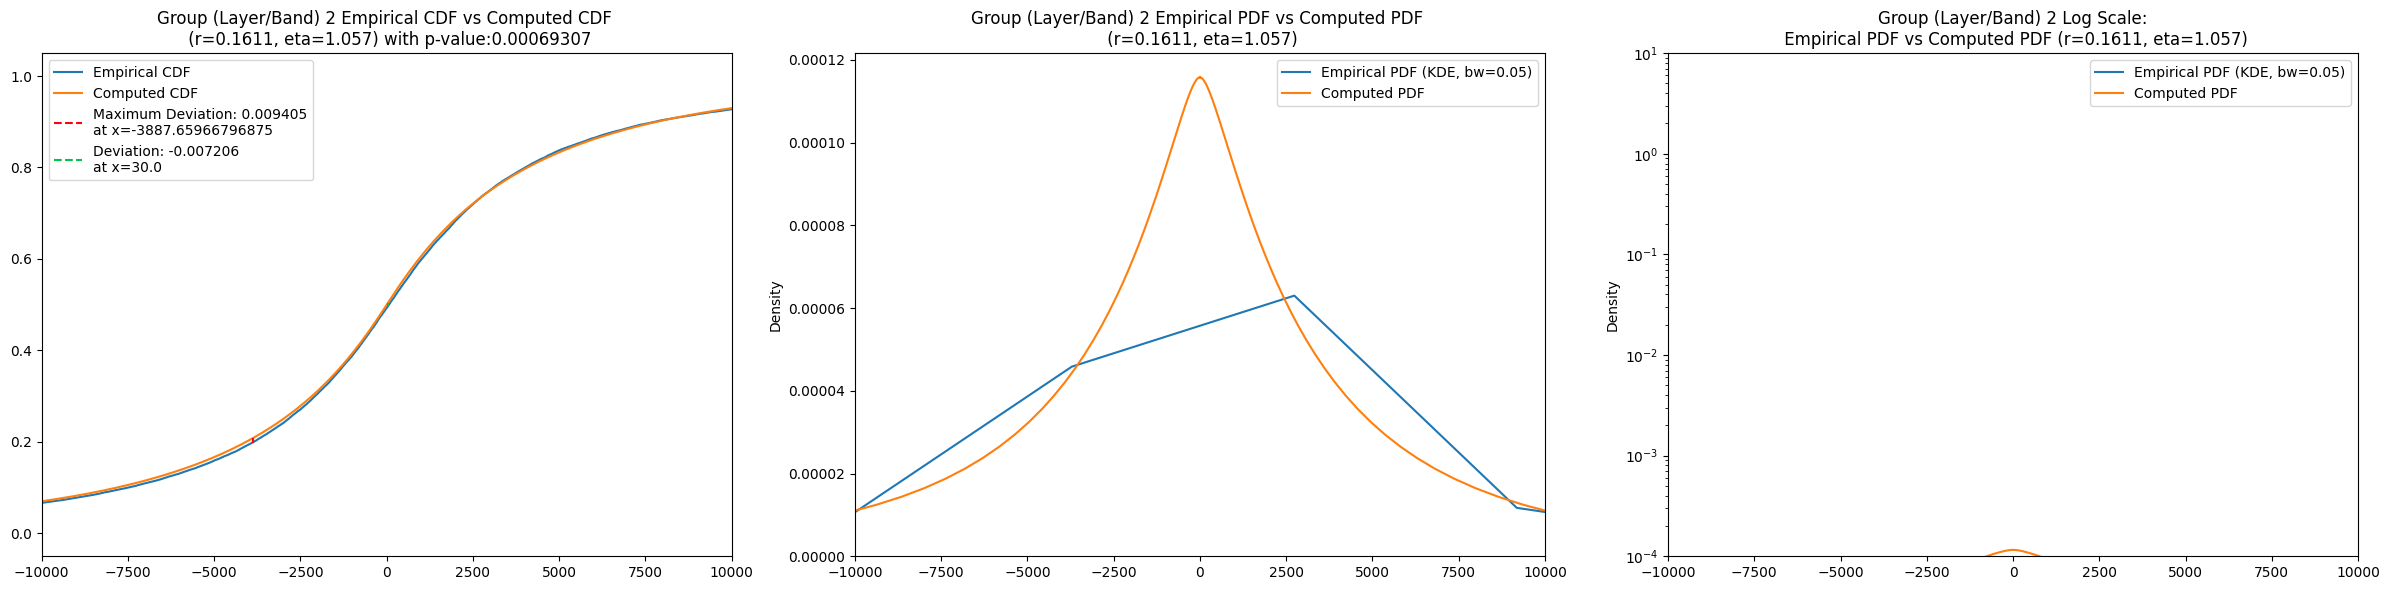

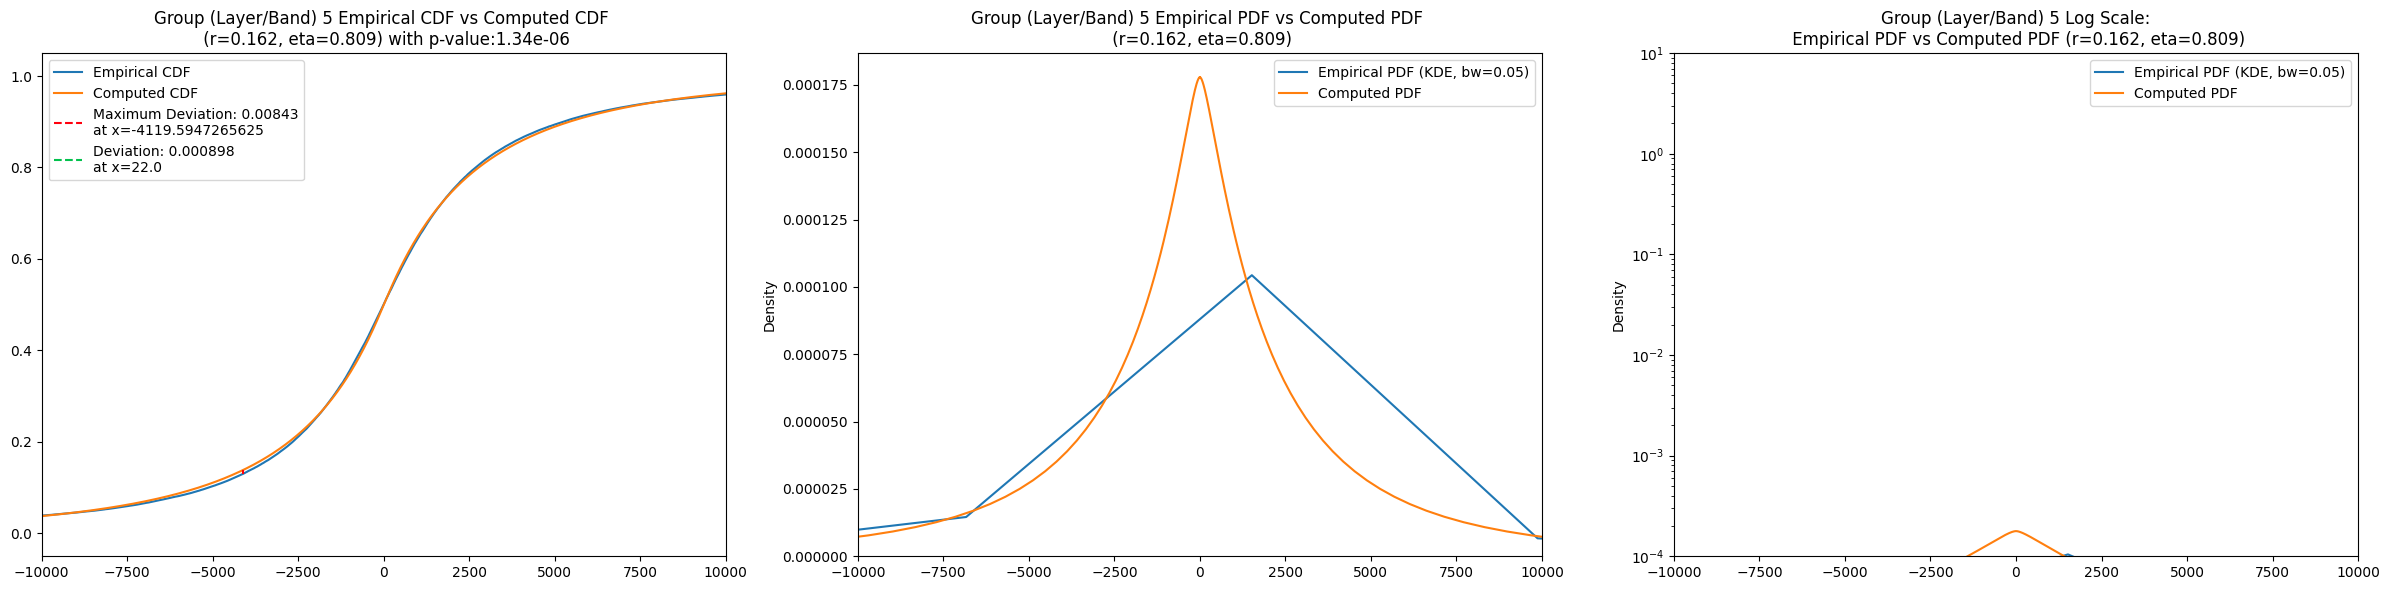

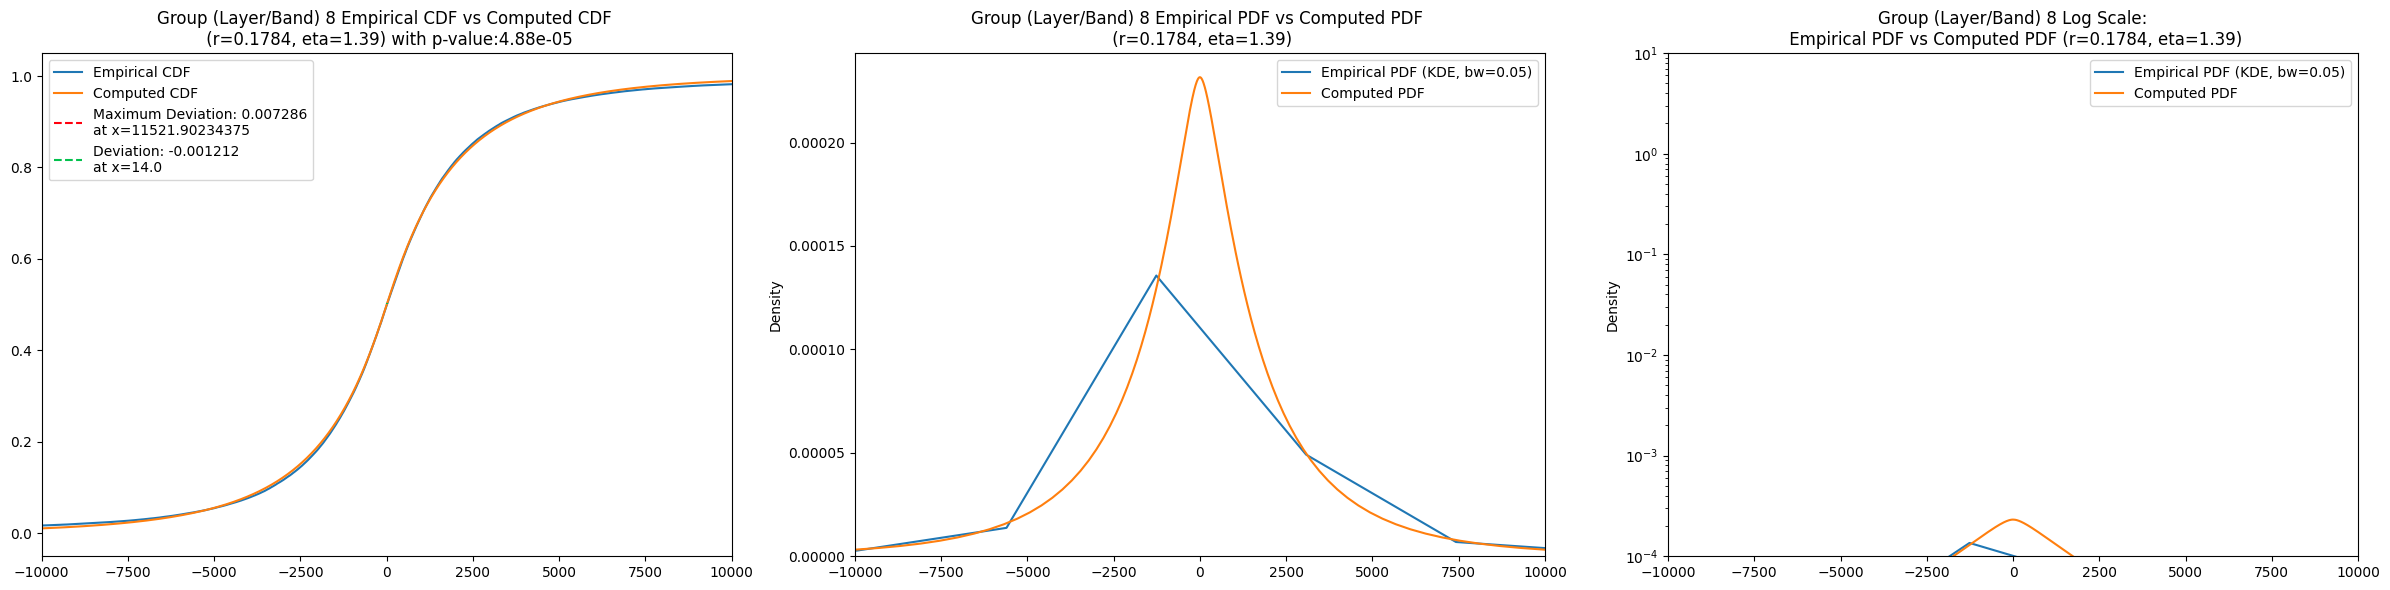

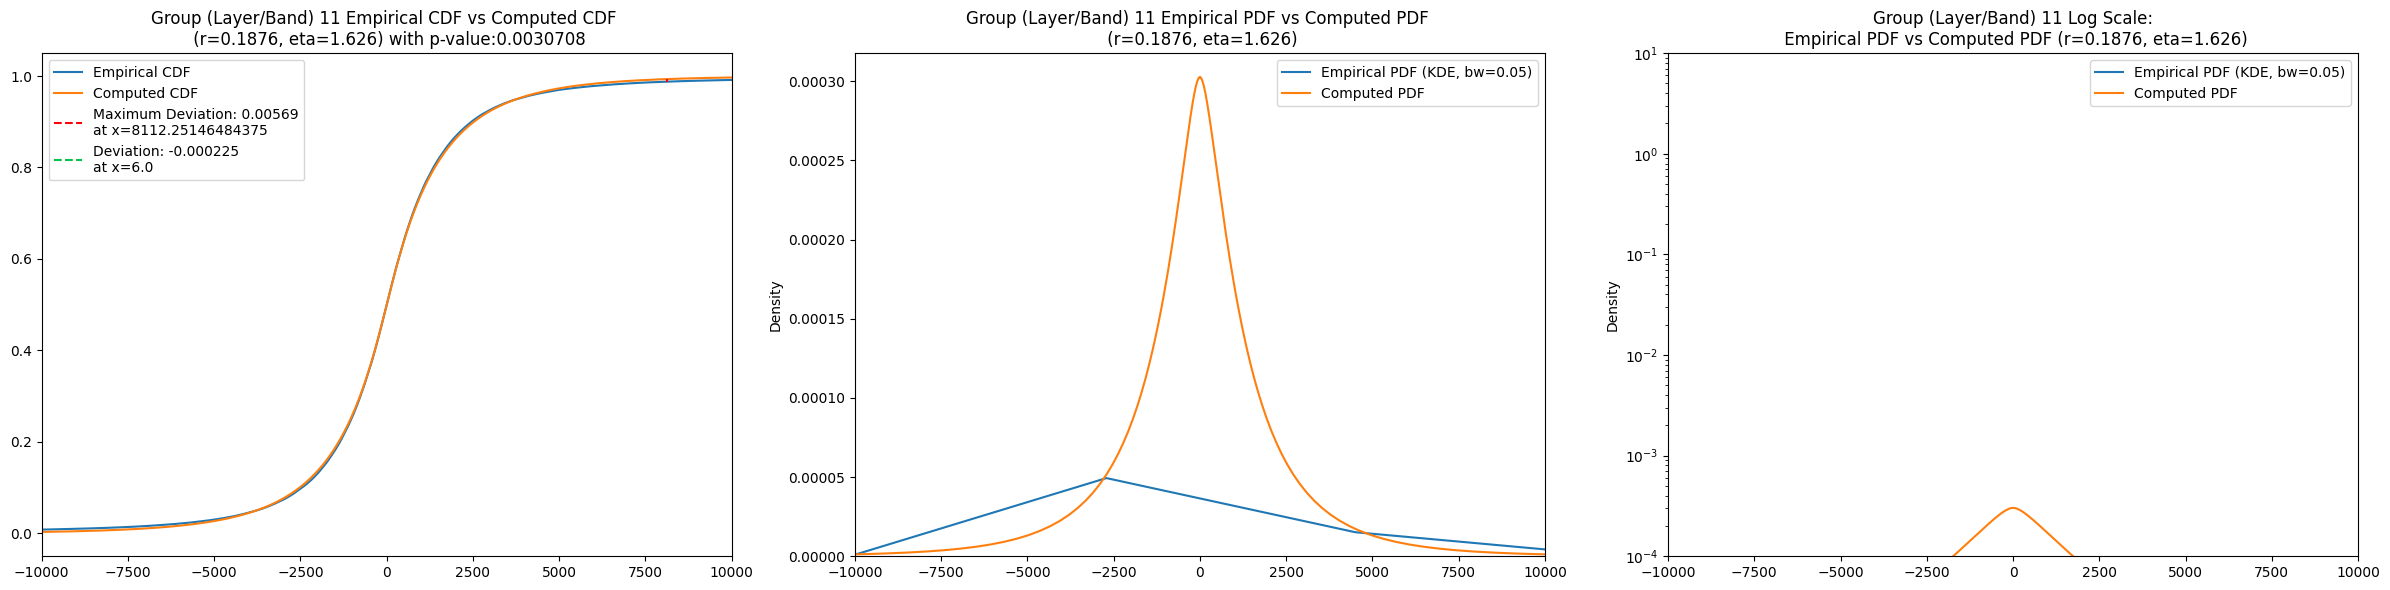

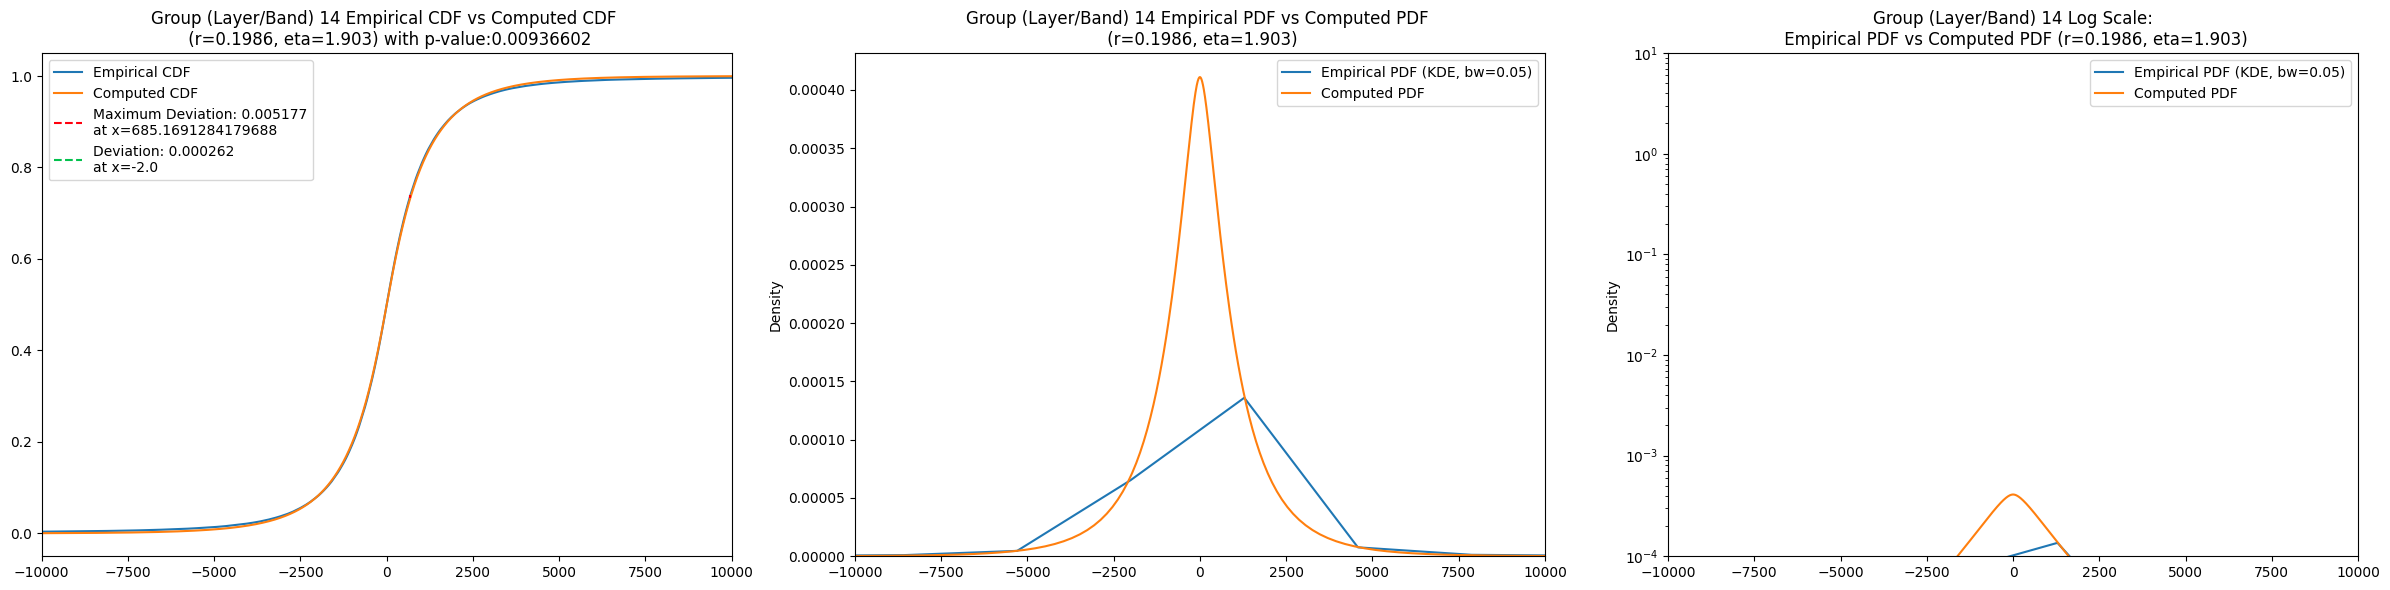

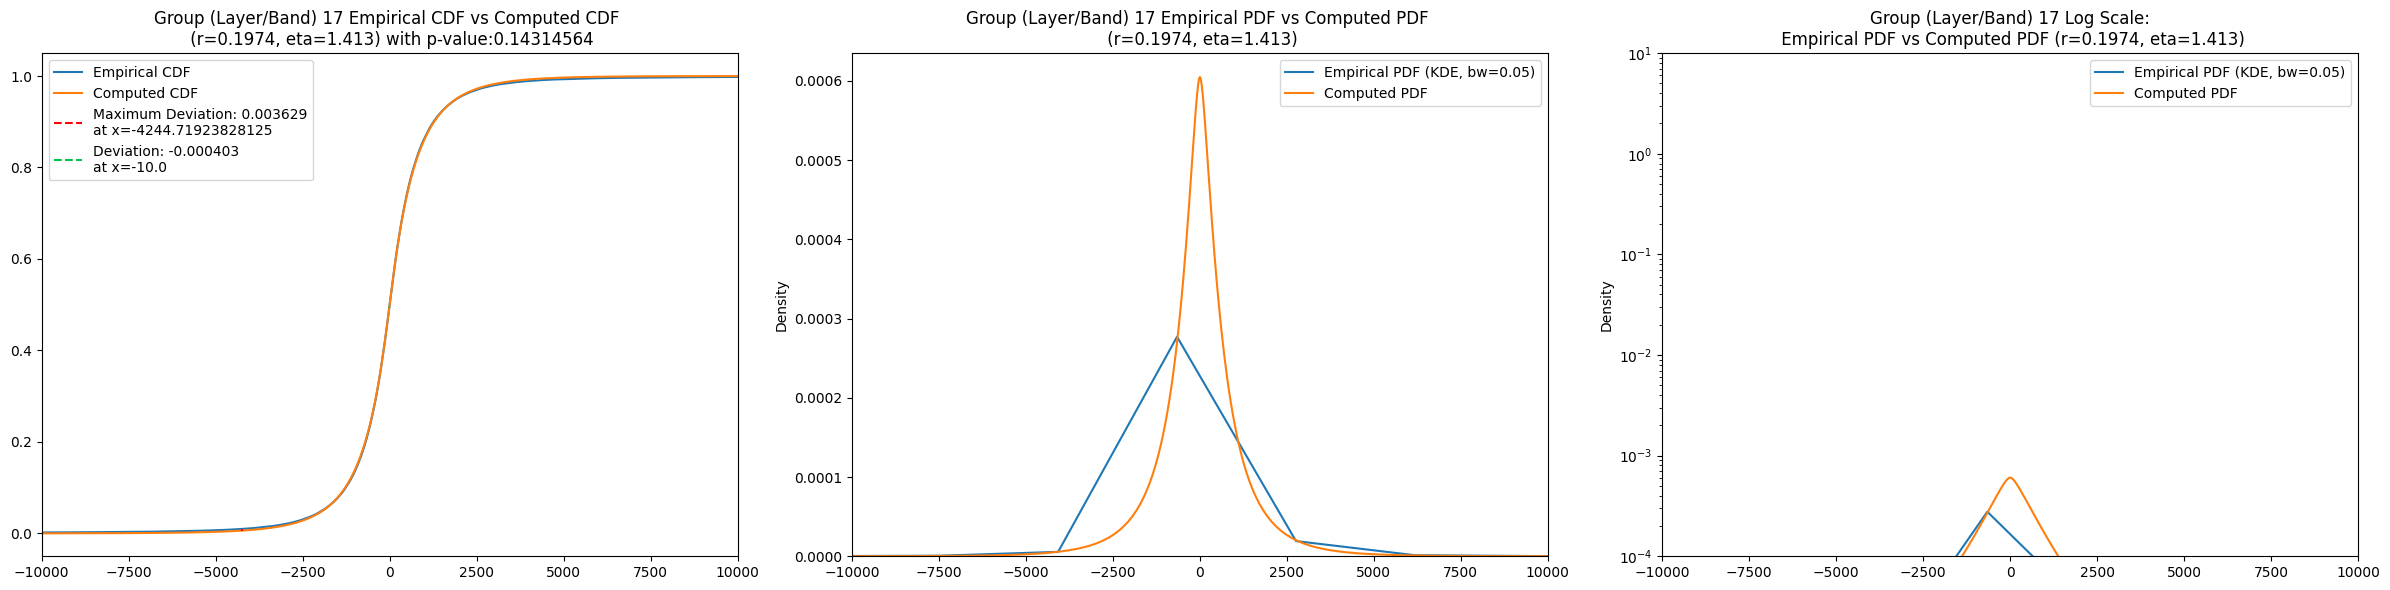

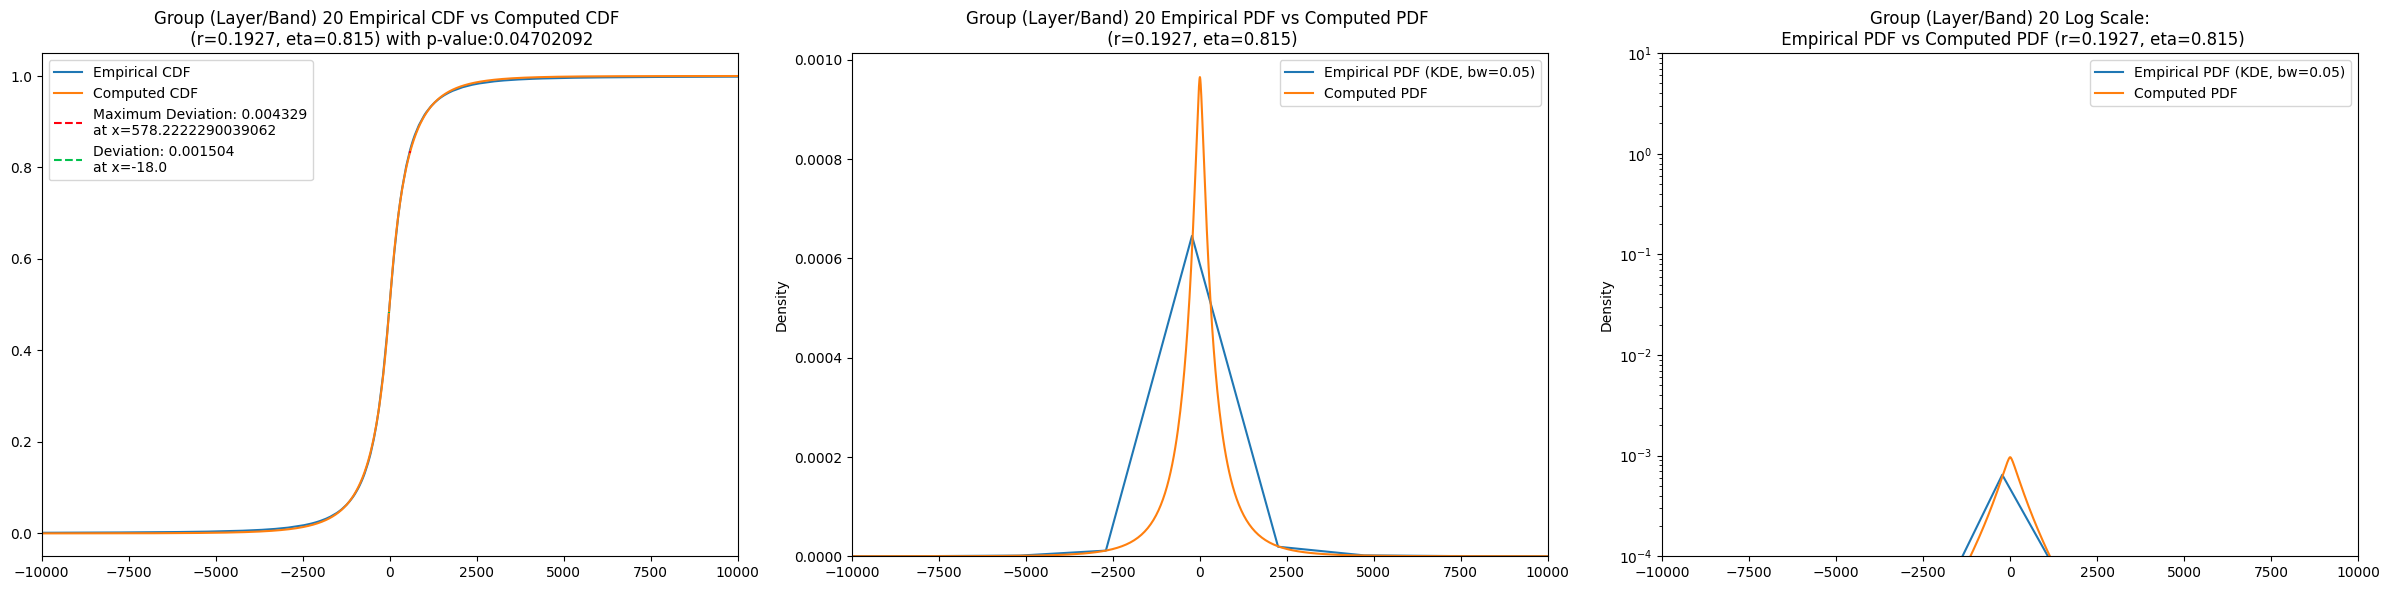

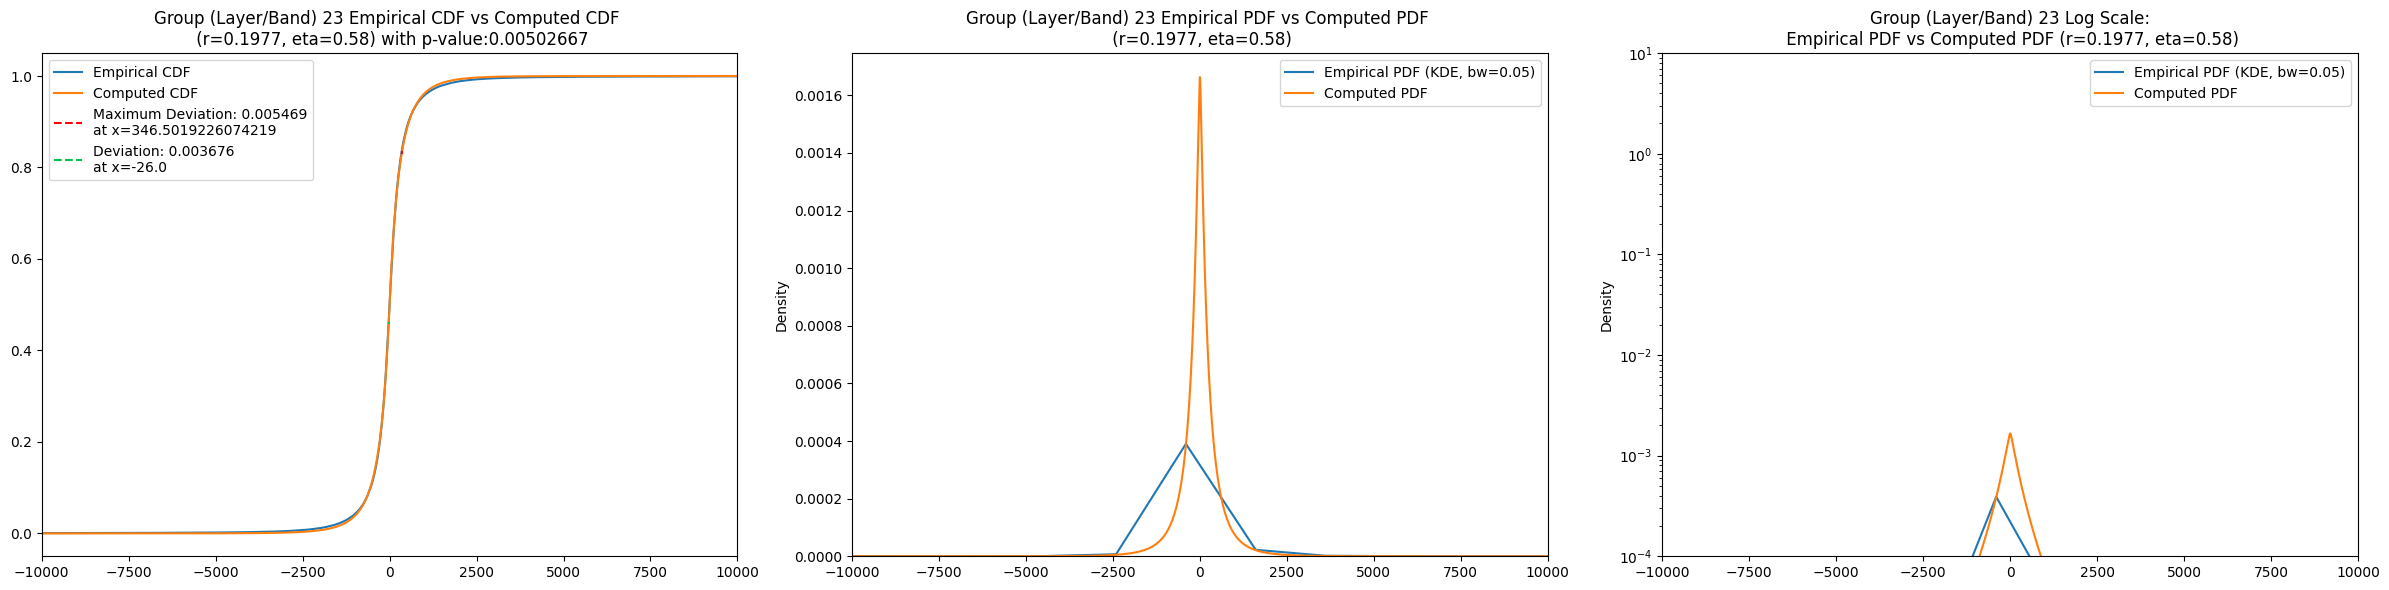

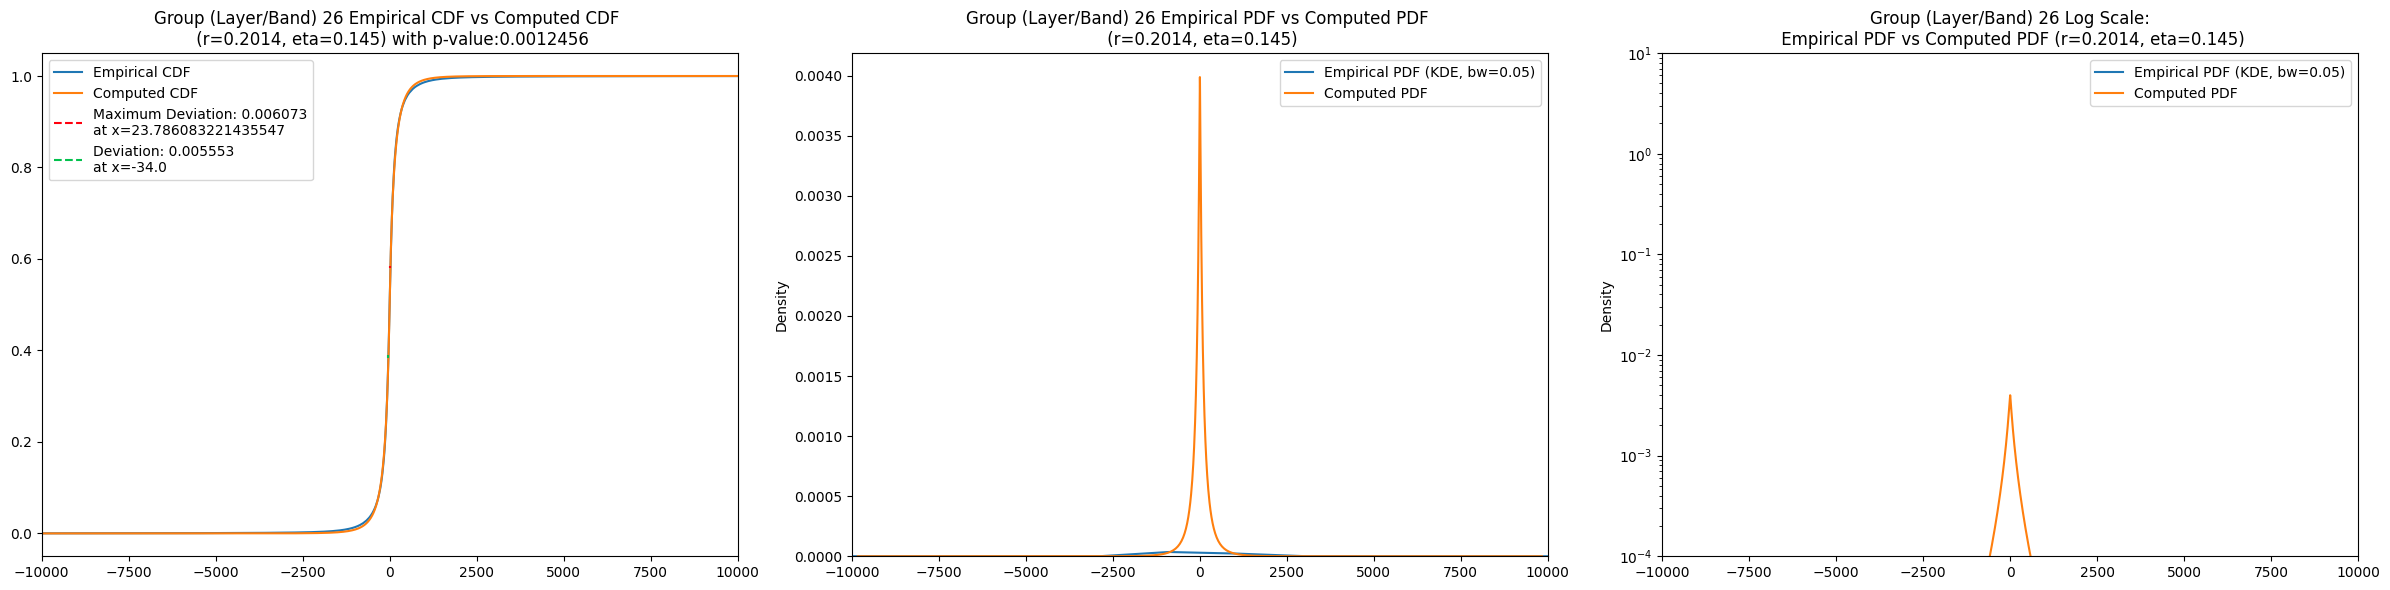

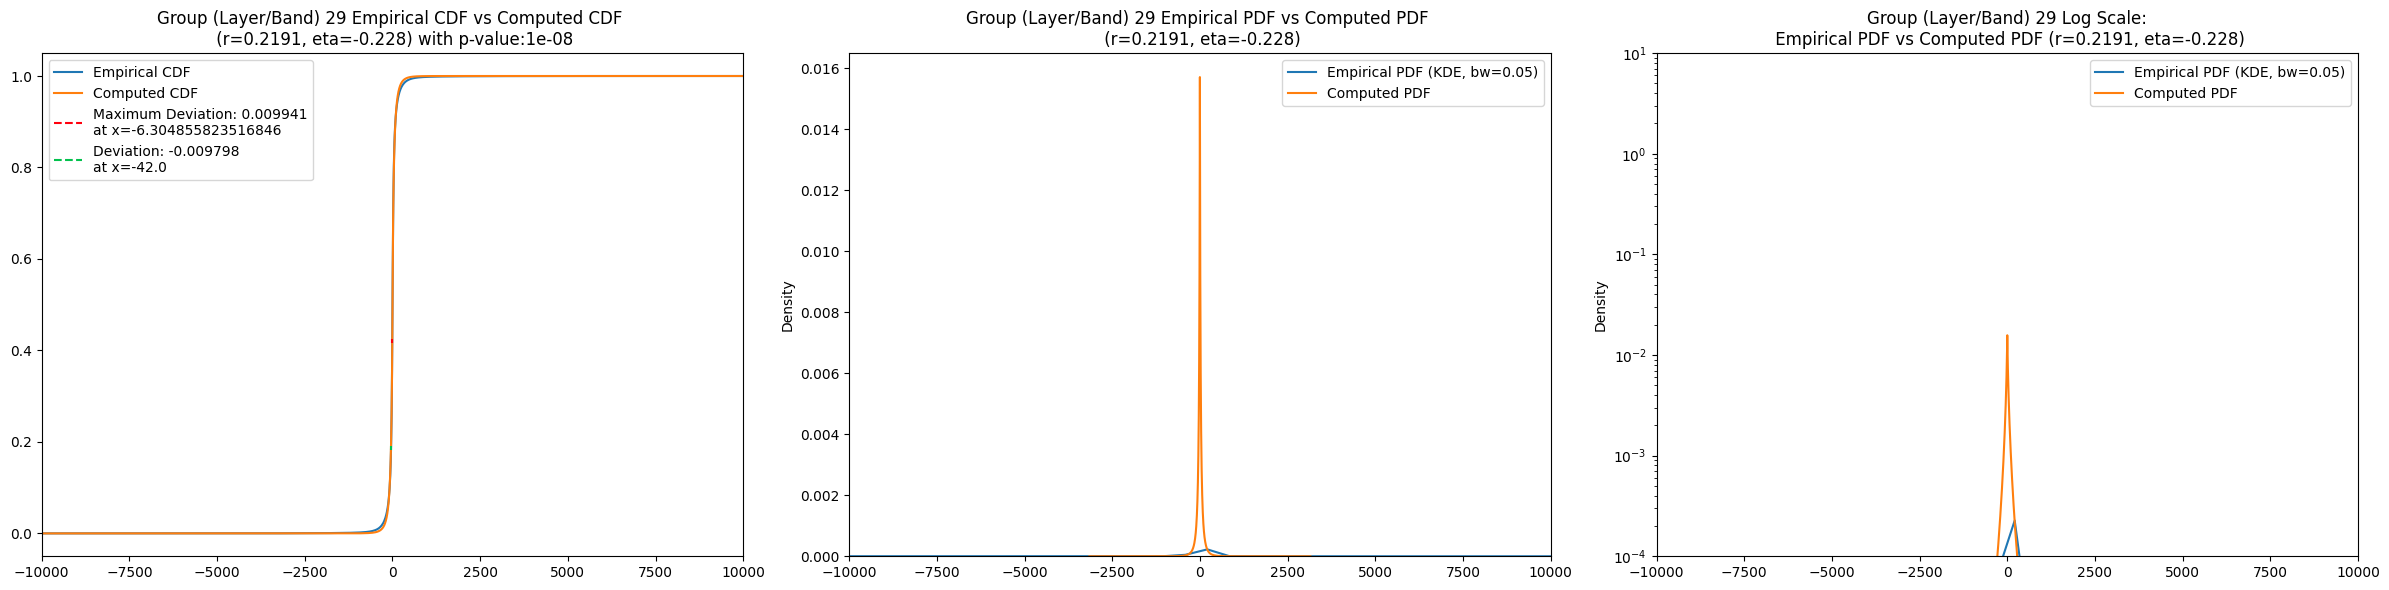

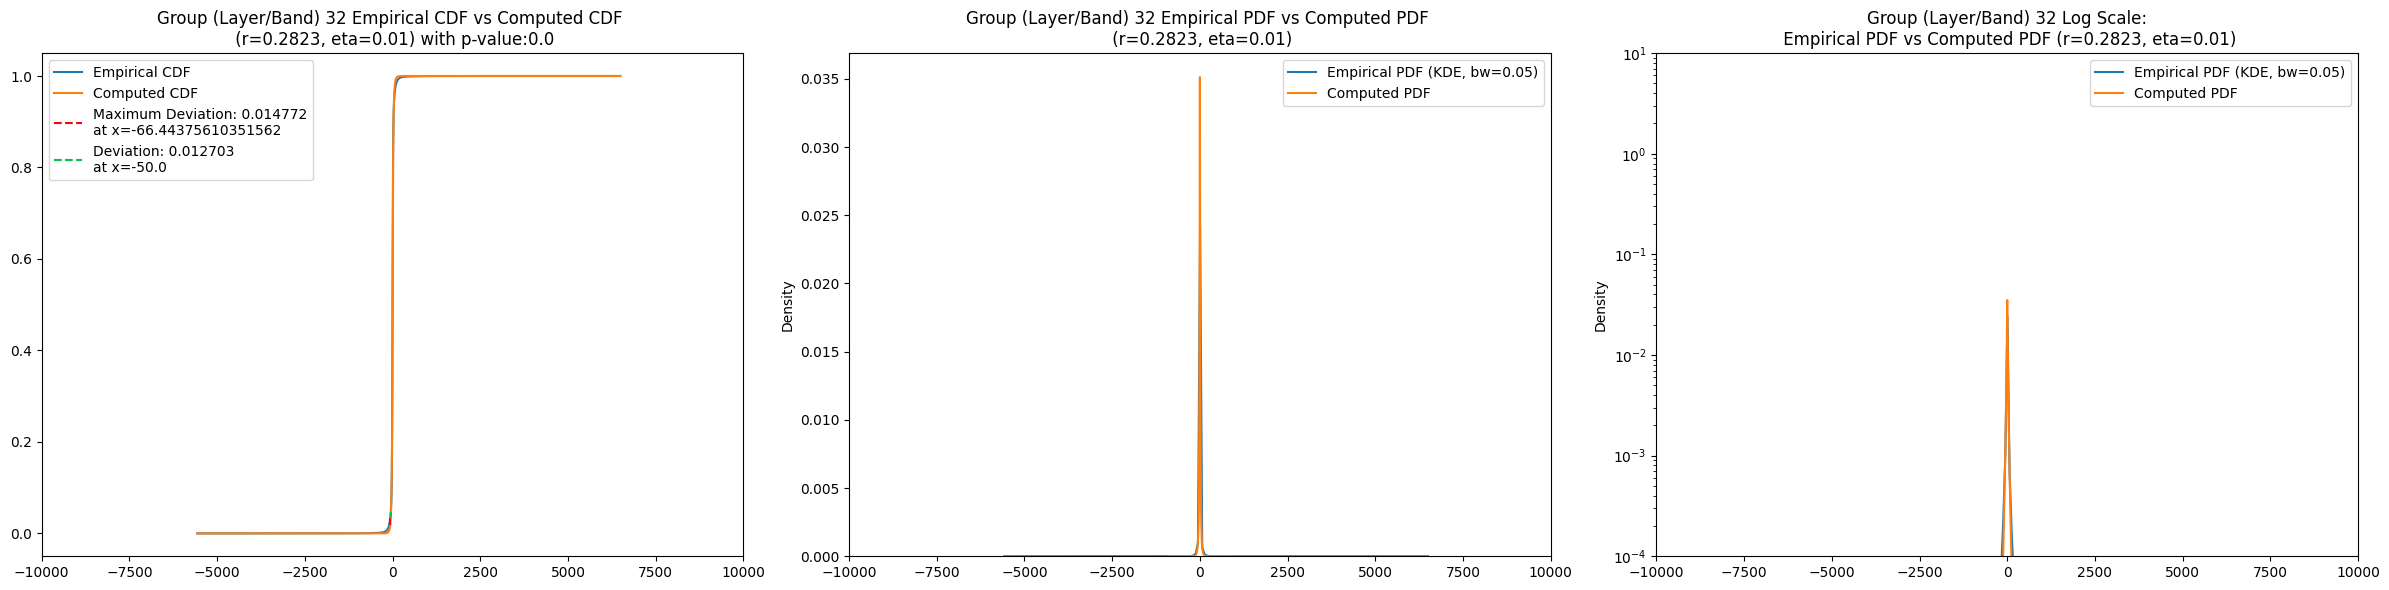

In [18]:
for group in GROUPS:
    group_info = master_df.loc[group]
    best_r = group_info['best_r']
    best_eta = group_info['best_eta']
    fig = visualize_cdf_pdf(sample = group_data_map[group], 
                    params = (best_r, best_eta), 
                    log_scale = True,
                    group = group,
                    interval = (-10000, 10000), #(-(40 - group//3.1*15), (40 - group//3.1*15)),
                    provided_loc=(30 - group//3.1*8))
    fig.savefig(os.path.join(CWD, "plots", f'compare_cdf_pdf_layer_{group}.jpg'), bbox_inches = 'tight', dpi = 600)

## Comparing with Gaussian and Laplace

In [19]:
def generate_func(sample, distro, *args, n_samples=200):
    if distro == 'gaussian' or distro == 'normal':
        def var_func(var):
            cdf = scipy.stats.norm(scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 'laplace':
        def var_func(var):
            cdf = scipy.stats.laplace(scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 't':
        def var_func(var):
            cdf = scipy.stats.t(df=2, scale=var).cdf
            return compute_ksstat(sample, cdf)
        return var_func
    elif distro == 'prior_r':
        eta = args[0]
        def r_func(r):
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples)
            return compute_ksstat(sample, cdf)
        return r_func
    elif distro == 'prior_eta':
        r = args[0]
        def eta_func(eta):
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples)
            return compute_ksstat(sample, cdf)
        return eta_func
    elif distro == 'prior':
        def r_eta_func(params):
            r = params[0]
            eta = params[1]
            cdf = compute_prior_cdf(r, eta, n_samples=n_samples, debug=False)
            return compute_ksstat(sample, cdf)
        return r_eta_func

    print("Please enter a valid argument for `distro`: 'gaussian', 'laplace', 'prior_r', 'prior_eta', 'prior', 't'")

In [20]:
master_df_path = Path(os.path.join(CWD, "CSVs", 'master_df.csv'))

if RERUN or not master_df_path.exists():
    upper_bound = int(1e6)
    for group in GROUPS:
        norm_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'gaussian'), method = 'bounded', bounds = (0, upper_bound))
        laplace_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 'laplace'), method = 'bounded', bounds = (0, upper_bound))
        t_result = scipy.optimize.minimize_scalar(generate_func(group_data_map[group], 't'), method = 'bounded', bounds = (0, upper_bound))
        
        master_df.loc[group, 'param_gaussian'] = round_to_sigfigs(norm_result['x'], 6)
        master_df.loc[group, 'kstest_stat_gaussian'] = round_to_sigfigs(norm_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_gaussian'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_gaussian']), 6)

        master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
        master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6)

        master_df.loc[group, 'param_laplace'] = round_to_sigfigs(laplace_result['x'], 6)
        master_df.loc[group, 'kstest_stat_laplace'] = round_to_sigfigs(laplace_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_laplace'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_laplace']), 6) 

        master_df.loc[group, 'param_t'] = round_to_sigfigs(t_result['x'], 6)
        master_df.loc[group, 'kstest_stat_t'] = round_to_sigfigs(t_result['fun'], 6)
        master_df.loc[group, 'kstest_pval_t'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_t']), 6) 

        master_df.loc[group, 'kstest_pval_gengamma'] = round_to_sigfigs(stats.kstwo(n=master_df.loc[group, 'total_samples']).sf(master_df.loc[group, 'kstest_stat_best']))

    master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df.csv'))
    
master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df.csv'), index_col = GROUP)
master_df

,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples,initial_r,initial_eta,kstest_stat_initial,...,param_gaussian,kstest_stat_gaussian,kstest_pval_gaussian,param_laplace,kstest_stat_laplace,kstest_pval_laplace,param_t,kstest_stat_t,kstest_pval_t,kstest_pval_gengamma
band,,,,,,,,,,,,,,,,,,,,,
2,2.585050e+08,1.589284e+08,4.078820e+08,356.08157,99.133300,600.4443,45000.0,0.16,1.0,0.010913,...,5228.2500,0.045990,3.791820e-83,4618.8700,0.020005,4.487170e-16,3666.4500,0.017295,4.016650e-12,6.930749e-04
5,1.529785e+08,8.631151e+07,3.112997e+08,813.59064,103.779990,2060.5480,117000.0,0.16,0.7,0.011256,...,3625.8200,0.042807,9.710740e-187,3210.7000,0.018556,2.003500e-35,2556.8900,0.012588,1.560770e-16,1.194809e-07
8,5.121678e+07,3.003023e+07,9.583308e+07,612.80610,92.325806,1727.8018,189000.0,0.18,1.5,0.008814,...,2415.7300,0.037672,1.751260e-233,2142.5300,0.014049,7.833270e-33,1699.5800,0.008674,8.836460e-13,3.846418e-09
11,3.090617e+07,1.261454e+07,1.278532e+08,5769.23900,83.057900,6259.8403,495000.0,0.19,1.7,0.008397,...,1768.9900,0.033941,0.000000e+00,1566.5100,0.010974,3.310420e-52,1254.9900,0.005896,2.258660e-15,2.396138e-14
14,1.055680e+07,5.359151e+06,3.458285e+07,2610.08280,75.710780,4860.0464,1134000.0,0.20,2.0,0.006294,...,1255.2300,0.032912,0.000000e+00,1105.2500,0.008823,4.143350e-77,896.8090,0.005659,5.723740e-32,7.950378e-27
17,6.451851e+06,2.578068e+06,3.393685e+07,11181.92200,65.416466,7685.5044,2574000.0,0.20,1.5,0.006467,...,898.7480,0.034483,0.000000e+00,790.9840,0.009403,4.203400e-198,640.0720,0.006743,4.463820e-102,7.118124e-30
20,3.491903e+06,1.486023e+06,1.712065e+07,6724.62650,70.291565,6708.6846,5967000.0,0.19,0.7,0.006697,...,623.3150,0.039409,0.000000e+00,549.6240,0.014132,0.000000e+00,441.6110,0.010026,0.000000e+00,1.540883e-97
23,1.724653e+06,5.911003e+05,1.148688e+07,16738.59000,63.702858,8285.5580,13887000.0,0.20,0.6,0.012452,...,378.2960,0.042260,0.000000e+00,334.4700,0.017541,0.000000e+00,266.9490,0.012045,0.000000e+00,0.000000e+00
26,1.045736e+06,1.697875e+05,1.057094e+07,32596.10400,71.612460,9318.7330,31968000.0,0.20,0.1,0.008531,...,177.8760,0.047941,0.000000e+00,158.1580,0.022784,0.000000e+00,124.7820,0.017958,0.000000e+00,0.000000e+00


In [21]:
# def add_metric_tail(metric_name = 'kstest_ratio',  distro = 'gengamma', tail_cutoffs = [0], layers = np.arange(2, 9)):
#     if metric_name == 'kstest_ratio':
#         metric = compute_ksratio
#     elif metric_name == 'kstest_stat':
#         metric = compute_ksstat_tail

#     for tail_cutoff in tail_cutoffs:
#         metrics = []
#         for layer in layers:
#             if distro == 'gengamma':
#                 cdf = all_cdfs[(master_df.loc[layer, 'initial_r'], master_df.loc[layer, 'initial_eta'])]
#             elif distro == 'gaussian':
#                 cdf = scipy.stats.norm(scale = master_df.loc[layer, 'param_gaussian']).cdf
#             elif distro == 'laplace':
#                 cdf = scipy.stats.norm(scale = master_df.loc[layer, 'param_laplace']).cdf
#             elif distro == 't':
#                 cdf = scipy.stats.t(df = 2, scale = master_df.loc[layer, 'param_t']).cdf
#             metrics.append(metric(group_data_map[layer], cdf, tail_cutoff = tail_cutoff))
#         master_df[metric_name + '_' + distro + '_' + f'tail{tail_cutoff}'] = metrics
        
# for group in GROUPS:
#     add_metric_tail('kstest_ratio', distro = 'gengamma', tail_cutoffs= [0,10], layers = np.arange(2, 9))
#     add_metric_tail('kstest_ratio', distro = 'gaussian', tail_cutoffs= [0,10], layers = np.arange(2, 9)) 
#     add_metric_tail('kstest_ratio', distro = 'laplace', tail_cutoffs= [0,10], layers = np.arange(2, 9))
#     add_metric_tail('kstest_ratio', distro = 't', tail_cutoffs= [0,10], layers = np.arange(2, 9))
#     add_metric_tail('kstest_stat', distro = 'gengamma', tail_cutoffs= [2, 10], layers = np.arange(2, 9))

# master_df.to_csv(os.path.join(CWD, "CSVs", 'master_df.csv'))

# master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df.csv'), index_col = GROUP)
# master_df

# Results

In [22]:
import pandas as pd
import git
from pathlib import Path
import os
DATA_NAME = 'batch0approx1e5-agriVision-fourier-gray'
ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
path_dict = dict(zip(['size', 'name', 'transform', 'channel'], DATA_NAME.split("-")))
CWD = os.path.join(ROOT_DIR, os.path.join("results", "case-studies", path_dict['name'], path_dict['transform'], path_dict['size'], path_dict['channel']))
assert CWD == os.getcwd()

Path(os.path.join(CWD, "CSVs")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "plots")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "cache")).mkdir(exist_ok=True)
Path(os.path.join(CWD, "groupCDFs")).mkdir(exist_ok=True)

GROUP = 'layer' if path_dict['transform'] == 'wavelet' else ('band' if path_dict['transform'] == 'fourier' else 'error')
CWD


master_df = pd.read_csv(os.path.join(CWD, "CSVs", 'master_df.csv'), index_col = GROUP)

In [23]:
master_df#.filter(regex='total_samples|kstest_stat.*')
#master_df.filter(regex='total_samples|param.*')
# master_df.filter(regex='.*gaussian')
#master_df.filter(regex='kstest_stat_.*[\_(tail\d)]')
#master_df.filter(regex='.*_tail\d\d?')
#master_df.filter(regex='.*_t_.*')


,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples,initial_r,initial_eta,kstest_stat_initial,...,param_gaussian,kstest_stat_gaussian,kstest_pval_gaussian,param_laplace,kstest_stat_laplace,kstest_pval_laplace,param_t,kstest_stat_t,kstest_pval_t,kstest_pval_gengamma
band,,,,,,,,,,,,,,,,,,,,,
2,2.585050e+08,1.589284e+08,4.078820e+08,356.08157,99.133300,600.4443,45000.0,0.16,1.0,0.010913,...,5228.2500,0.045990,3.791820e-83,4618.8700,0.020005,4.487170e-16,3666.4500,0.017295,4.016650e-12,6.930749e-04
5,1.529785e+08,8.631151e+07,3.112997e+08,813.59064,103.779990,2060.5480,117000.0,0.16,0.7,0.011256,...,3625.8200,0.042807,9.710740e-187,3210.7000,0.018556,2.003500e-35,2556.8900,0.012588,1.560770e-16,1.194809e-07
8,5.121678e+07,3.003023e+07,9.583308e+07,612.80610,92.325806,1727.8018,189000.0,0.18,1.5,0.008814,...,2415.7300,0.037672,1.751260e-233,2142.5300,0.014049,7.833270e-33,1699.5800,0.008674,8.836460e-13,3.846418e-09
11,3.090617e+07,1.261454e+07,1.278532e+08,5769.23900,83.057900,6259.8403,495000.0,0.19,1.7,0.008397,...,1768.9900,0.033941,0.000000e+00,1566.5100,0.010974,3.310420e-52,1254.9900,0.005896,2.258660e-15,2.396138e-14
14,1.055680e+07,5.359151e+06,3.458285e+07,2610.08280,75.710780,4860.0464,1134000.0,0.20,2.0,0.006294,...,1255.2300,0.032912,0.000000e+00,1105.2500,0.008823,4.143350e-77,896.8090,0.005659,5.723740e-32,7.950378e-27
17,6.451851e+06,2.578068e+06,3.393685e+07,11181.92200,65.416466,7685.5044,2574000.0,0.20,1.5,0.006467,...,898.7480,0.034483,0.000000e+00,790.9840,0.009403,4.203400e-198,640.0720,0.006743,4.463820e-102,7.118124e-30
20,3.491903e+06,1.486023e+06,1.712065e+07,6724.62650,70.291565,6708.6846,5967000.0,0.19,0.7,0.006697,...,623.3150,0.039409,0.000000e+00,549.6240,0.014132,0.000000e+00,441.6110,0.010026,0.000000e+00,1.540883e-97
23,1.724653e+06,5.911003e+05,1.148688e+07,16738.59000,63.702858,8285.5580,13887000.0,0.20,0.6,0.012452,...,378.2960,0.042260,0.000000e+00,334.4700,0.017541,0.000000e+00,266.9490,0.012045,0.000000e+00,0.000000e+00
26,1.045736e+06,1.697875e+05,1.057094e+07,32596.10400,71.612460,9318.7330,31968000.0,0.20,0.1,0.008531,...,177.8760,0.047941,0.000000e+00,158.1580,0.022784,0.000000e+00,124.7820,0.017958,0.000000e+00,0.000000e+00
